<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook is created to handle the outliers in the data in different methods.

<h2><font color=slateblue> Preparing the tools </font></h2>

In [1]:
# Regular EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the style
plt.style.use("ggplot")

<h2><font color=slateblue> Handle outliers </font></h2>

<h4><font color=mediumvioletred>Read CSV files </font></h4>

In [2]:
# read prepared dataset csv file
df = pd.read_csv("data/df_prepared_full_data.csv")
df.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
1237,5646,1283.0,11.009646,31.268225,6.779883,22.184754,599.902714,2021,2,7,6,38
3478,5646,11063.0,8.007970,68.806087,3.160958,208.888572,782.958294,2021,4,16,4,106
775,5621,2748.0,13.485848,225.221720,3.409267,42.833082,427.473604,2021,1,24,6,24
4604,5611,15652.0,17.088066,231.248959,4.035688,186.289235,759.428834,2021,5,20,3,140
8993,5633,12147.0,7.421515,231.822506,5.135321,97.074753,765.167407,2021,9,30,3,273


<h4><font color=mediumvioletred>Create a method to visualize distribution </font></h4>

In [3]:
def visualizeDistribution(df, column, label):
    # Subplot of distribution
    fig, (ax0, ax1) = plt.subplots(nrows=2,
                                    ncols=1,
                                    figsize=(30, 20),
                                    sharex=False)

    # Add data to ax0
    red_square = dict(markerfacecolor="lightblue", marker="s")
    ax0.boxplot(df[column], vert=False, flierprops=red_square);
    # Add data to ax1
    ax1.hist(df[column], bins=30, color="lightblue");

    # Customize ax0
    ax0.set(title="Boxplot " + label);

    # Customize ax1
    ax1.set(title="Histogram " + label,
            xlabel=label,
            ylabel="Distribution");

    # Add a title to the figure
    fig.suptitle("The distribution of " + label, fontsize=20, fontweight="bold");

<h4><font color=mediumvioletred>Check pollution distribution in df</font></h4>

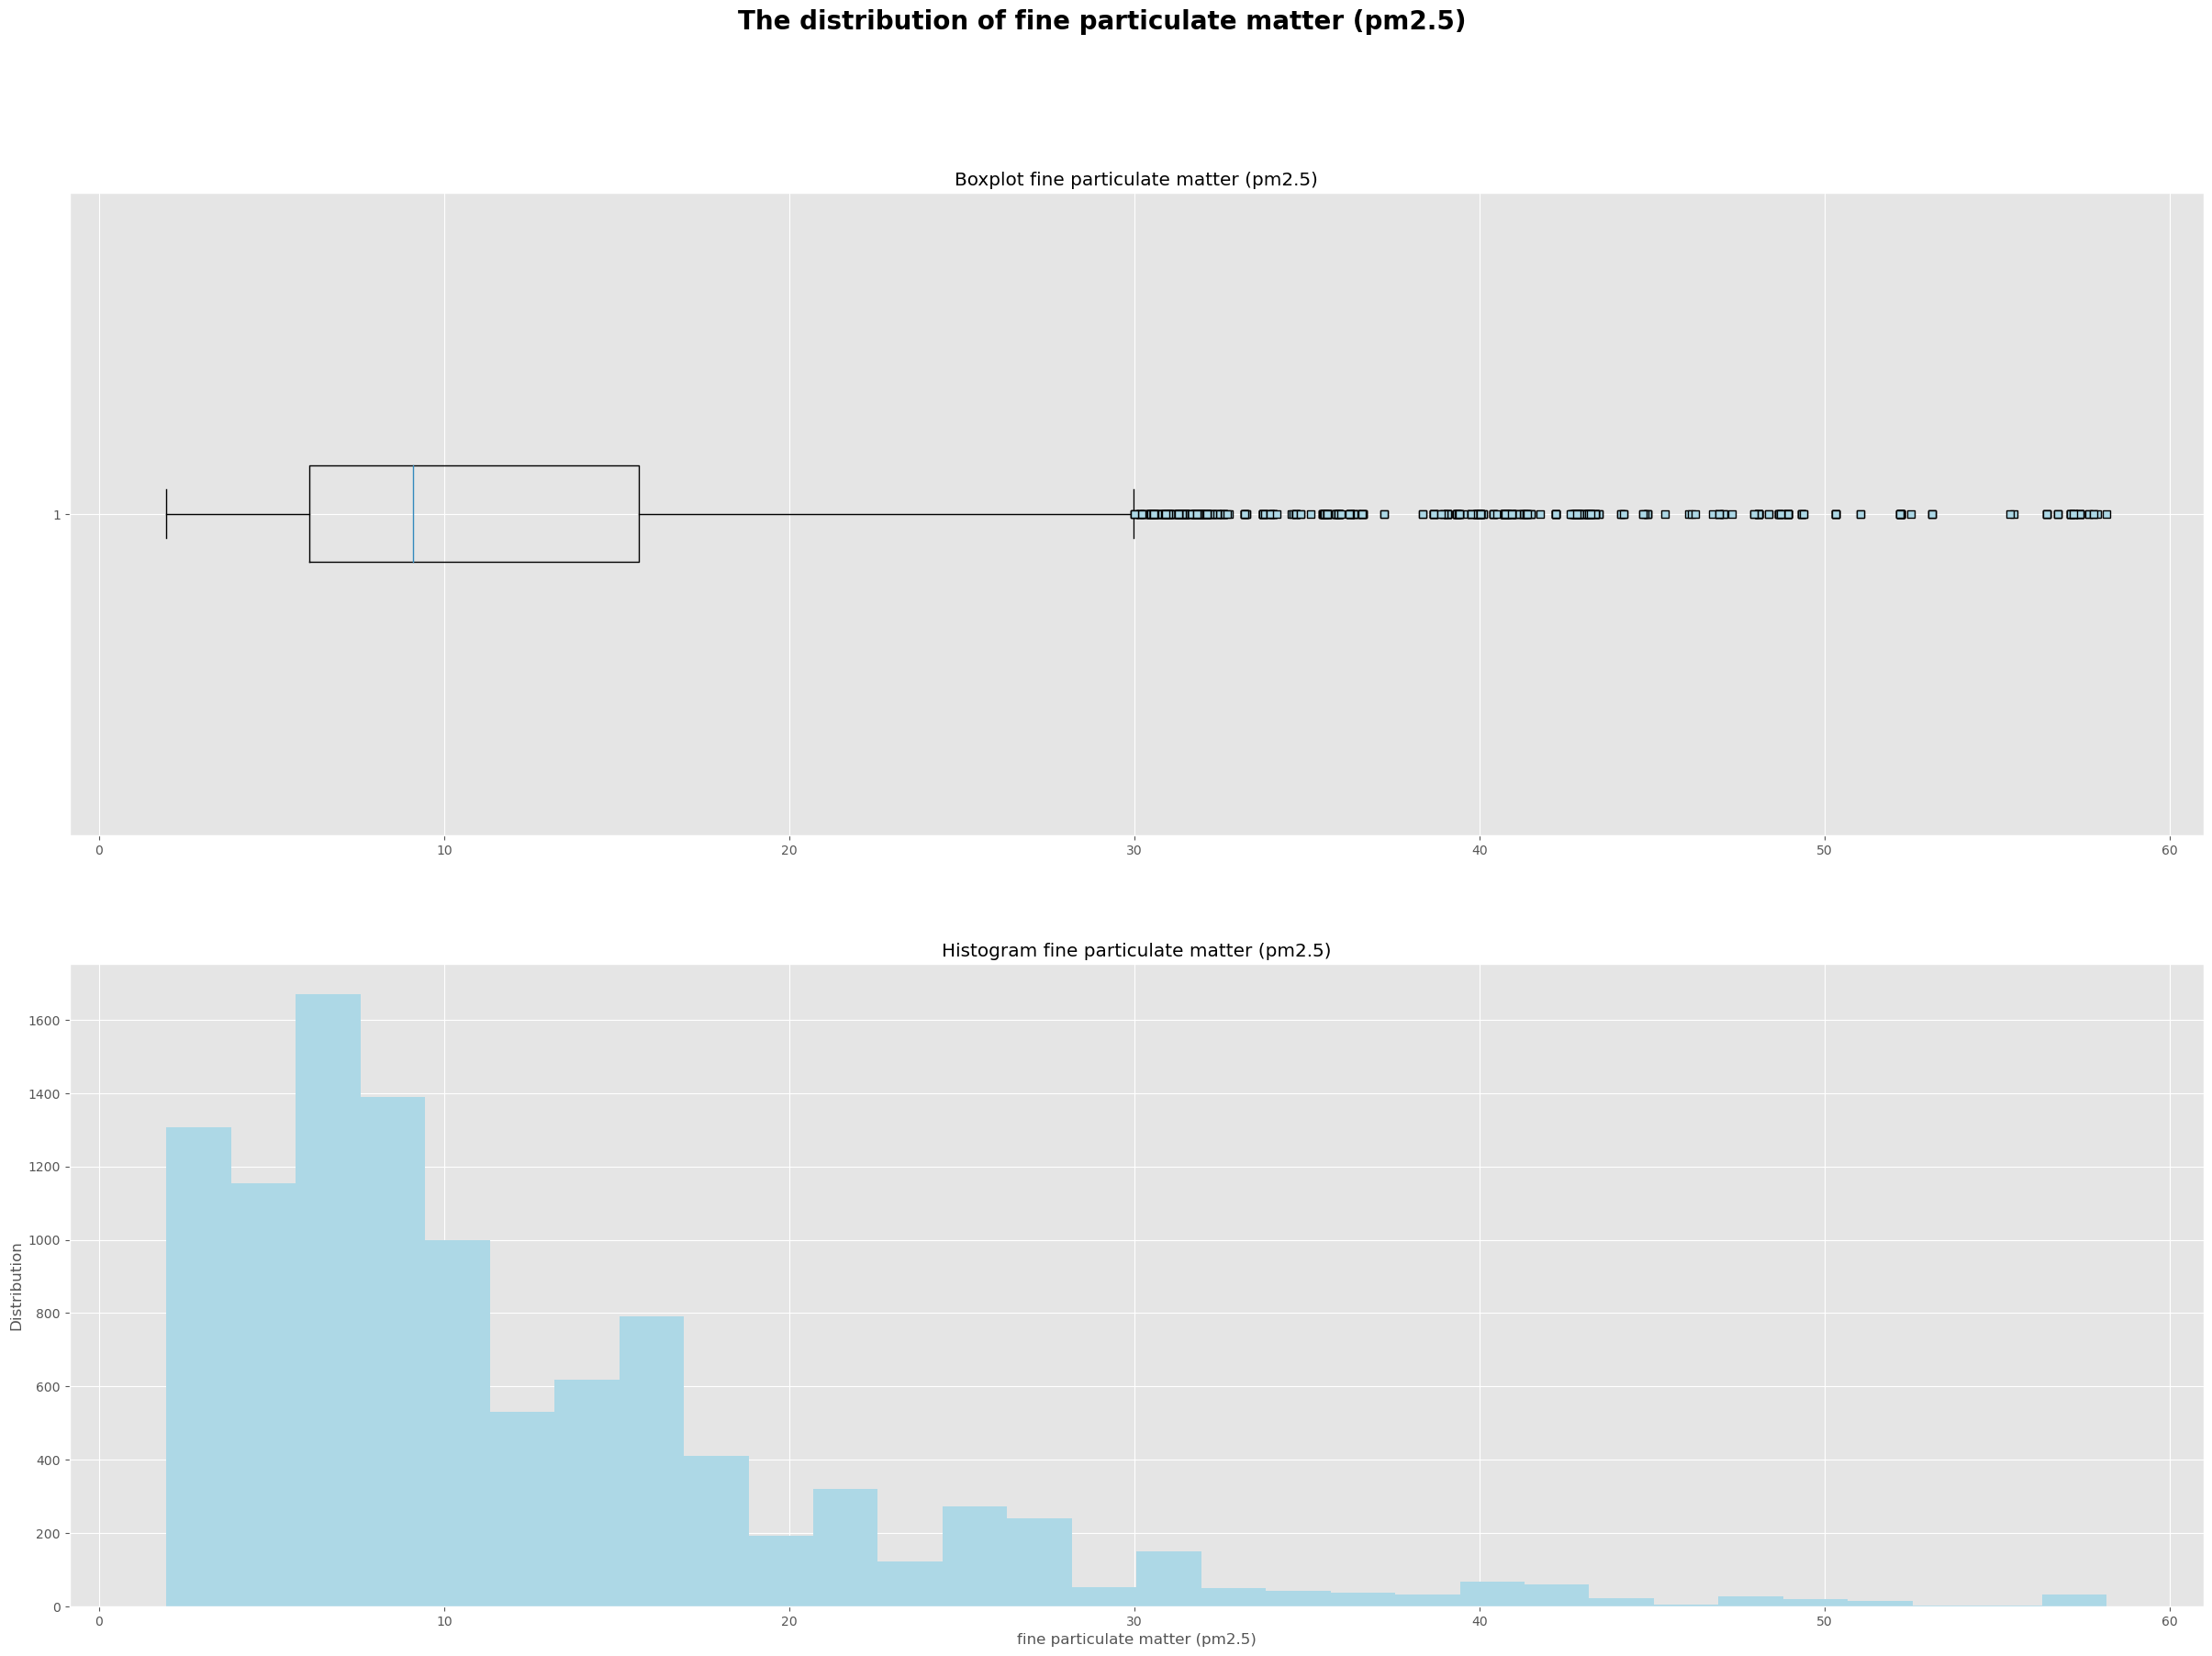

In [4]:
visualizeDistribution(df, "pm2.5", "fine particulate matter (pm2.5)")

<h3><font color=steelblue>Remove pm2.5 outliers </font></h3>

<h4><font color=mediumvioletred>Remove outliers</font></h4>

In [5]:
# make a copy of the dataframe
df_removed_outliers = df.copy()

In [6]:
df_removed_outliers = df_removed_outliers.drop(df_removed_outliers.loc[df_removed_outliers['pm2.5'] >= 30].index)

<h4><font color=mediumvioletred>Check pollution distribution in df_removed_outliers</font></h4>

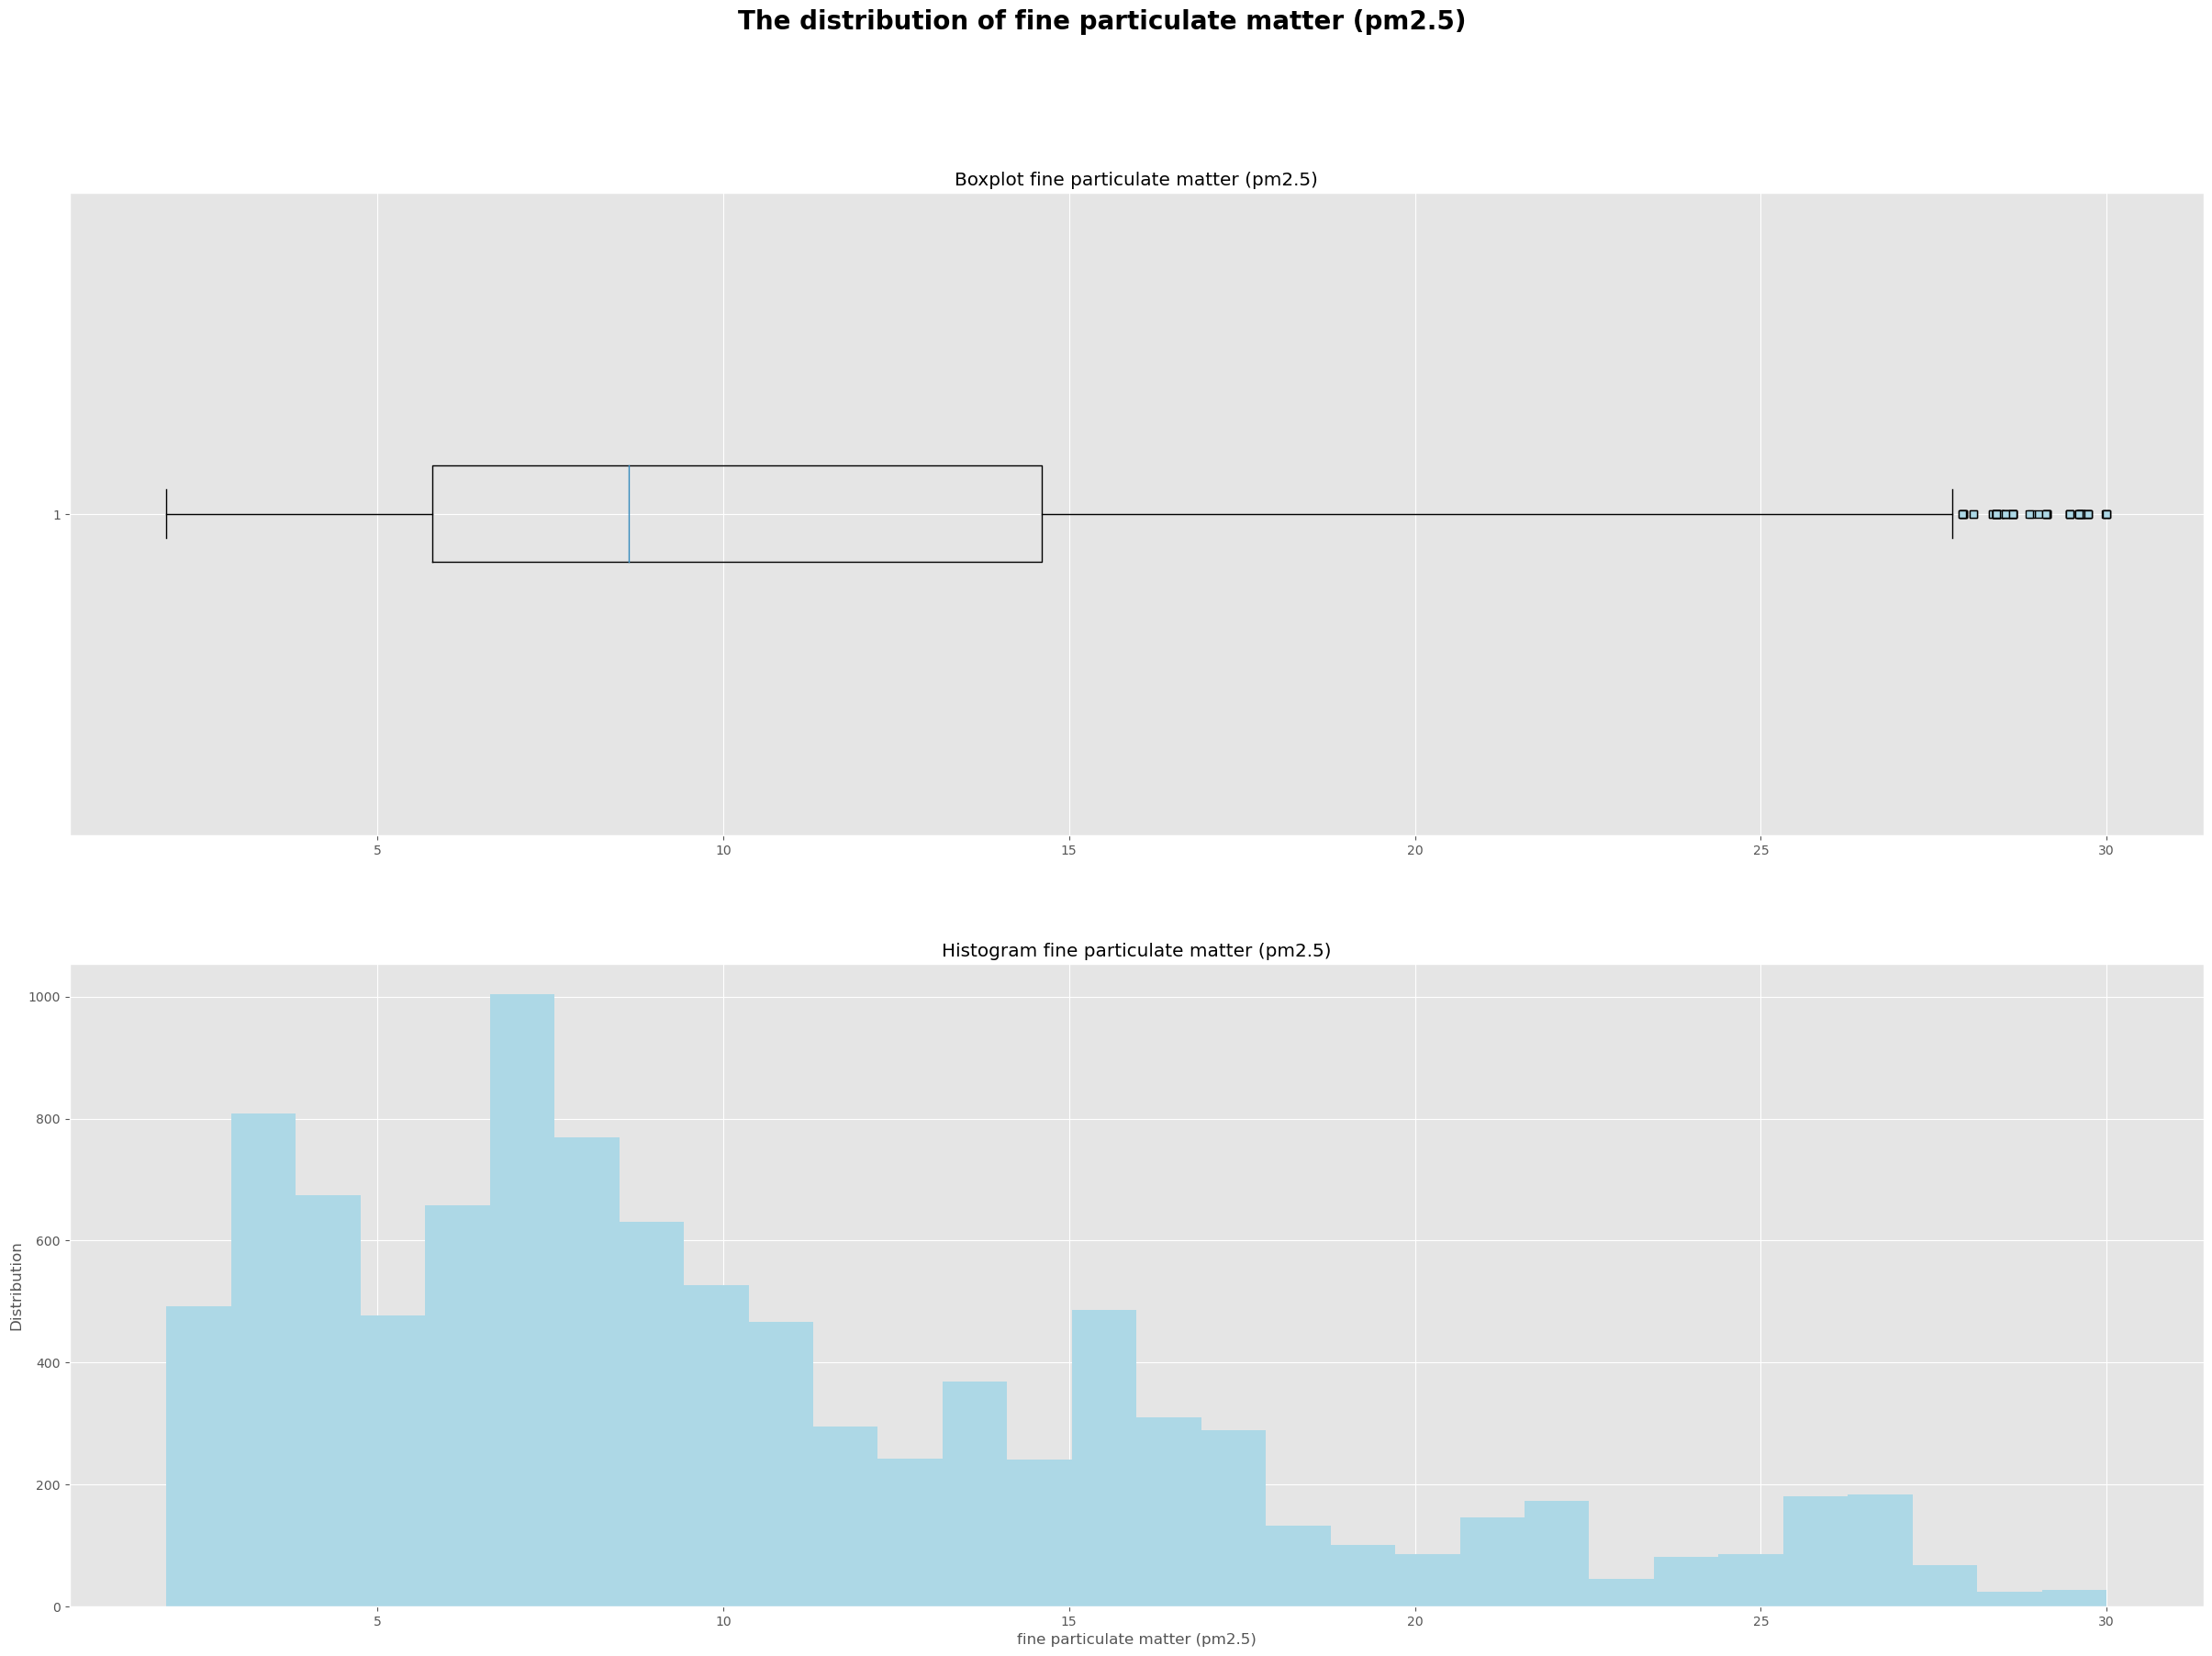

In [7]:
visualizeDistribution(df_removed_outliers, "pm2.5", "fine particulate matter (pm2.5)")

<h4><font color=mediumvioletred>Export df_removed_pollution_outliers to csv</font></h4>

In [8]:
df_removed_outliers.to_csv("data/df_removed_pollution_outliers.csv", index=False)

<h3><font color=steelblue>Replace pm2.5 outliers with median </font></h3>

<h4><font color=mediumvioletred>Replace outliers with median</font></h4>

In [9]:
# make a copy of the dataframe
df_replaced_median_outliers = df.copy()

In [10]:
df_replaced_median_outliers.loc[df_replaced_median_outliers['pm2.5'] >= 27, 'pm2.5'] = df_replaced_median_outliers['pm2.5'].median()

<h4><font color=mediumvioletred>Check pollution distribution in df_replaced_median_outliers</font></h4>

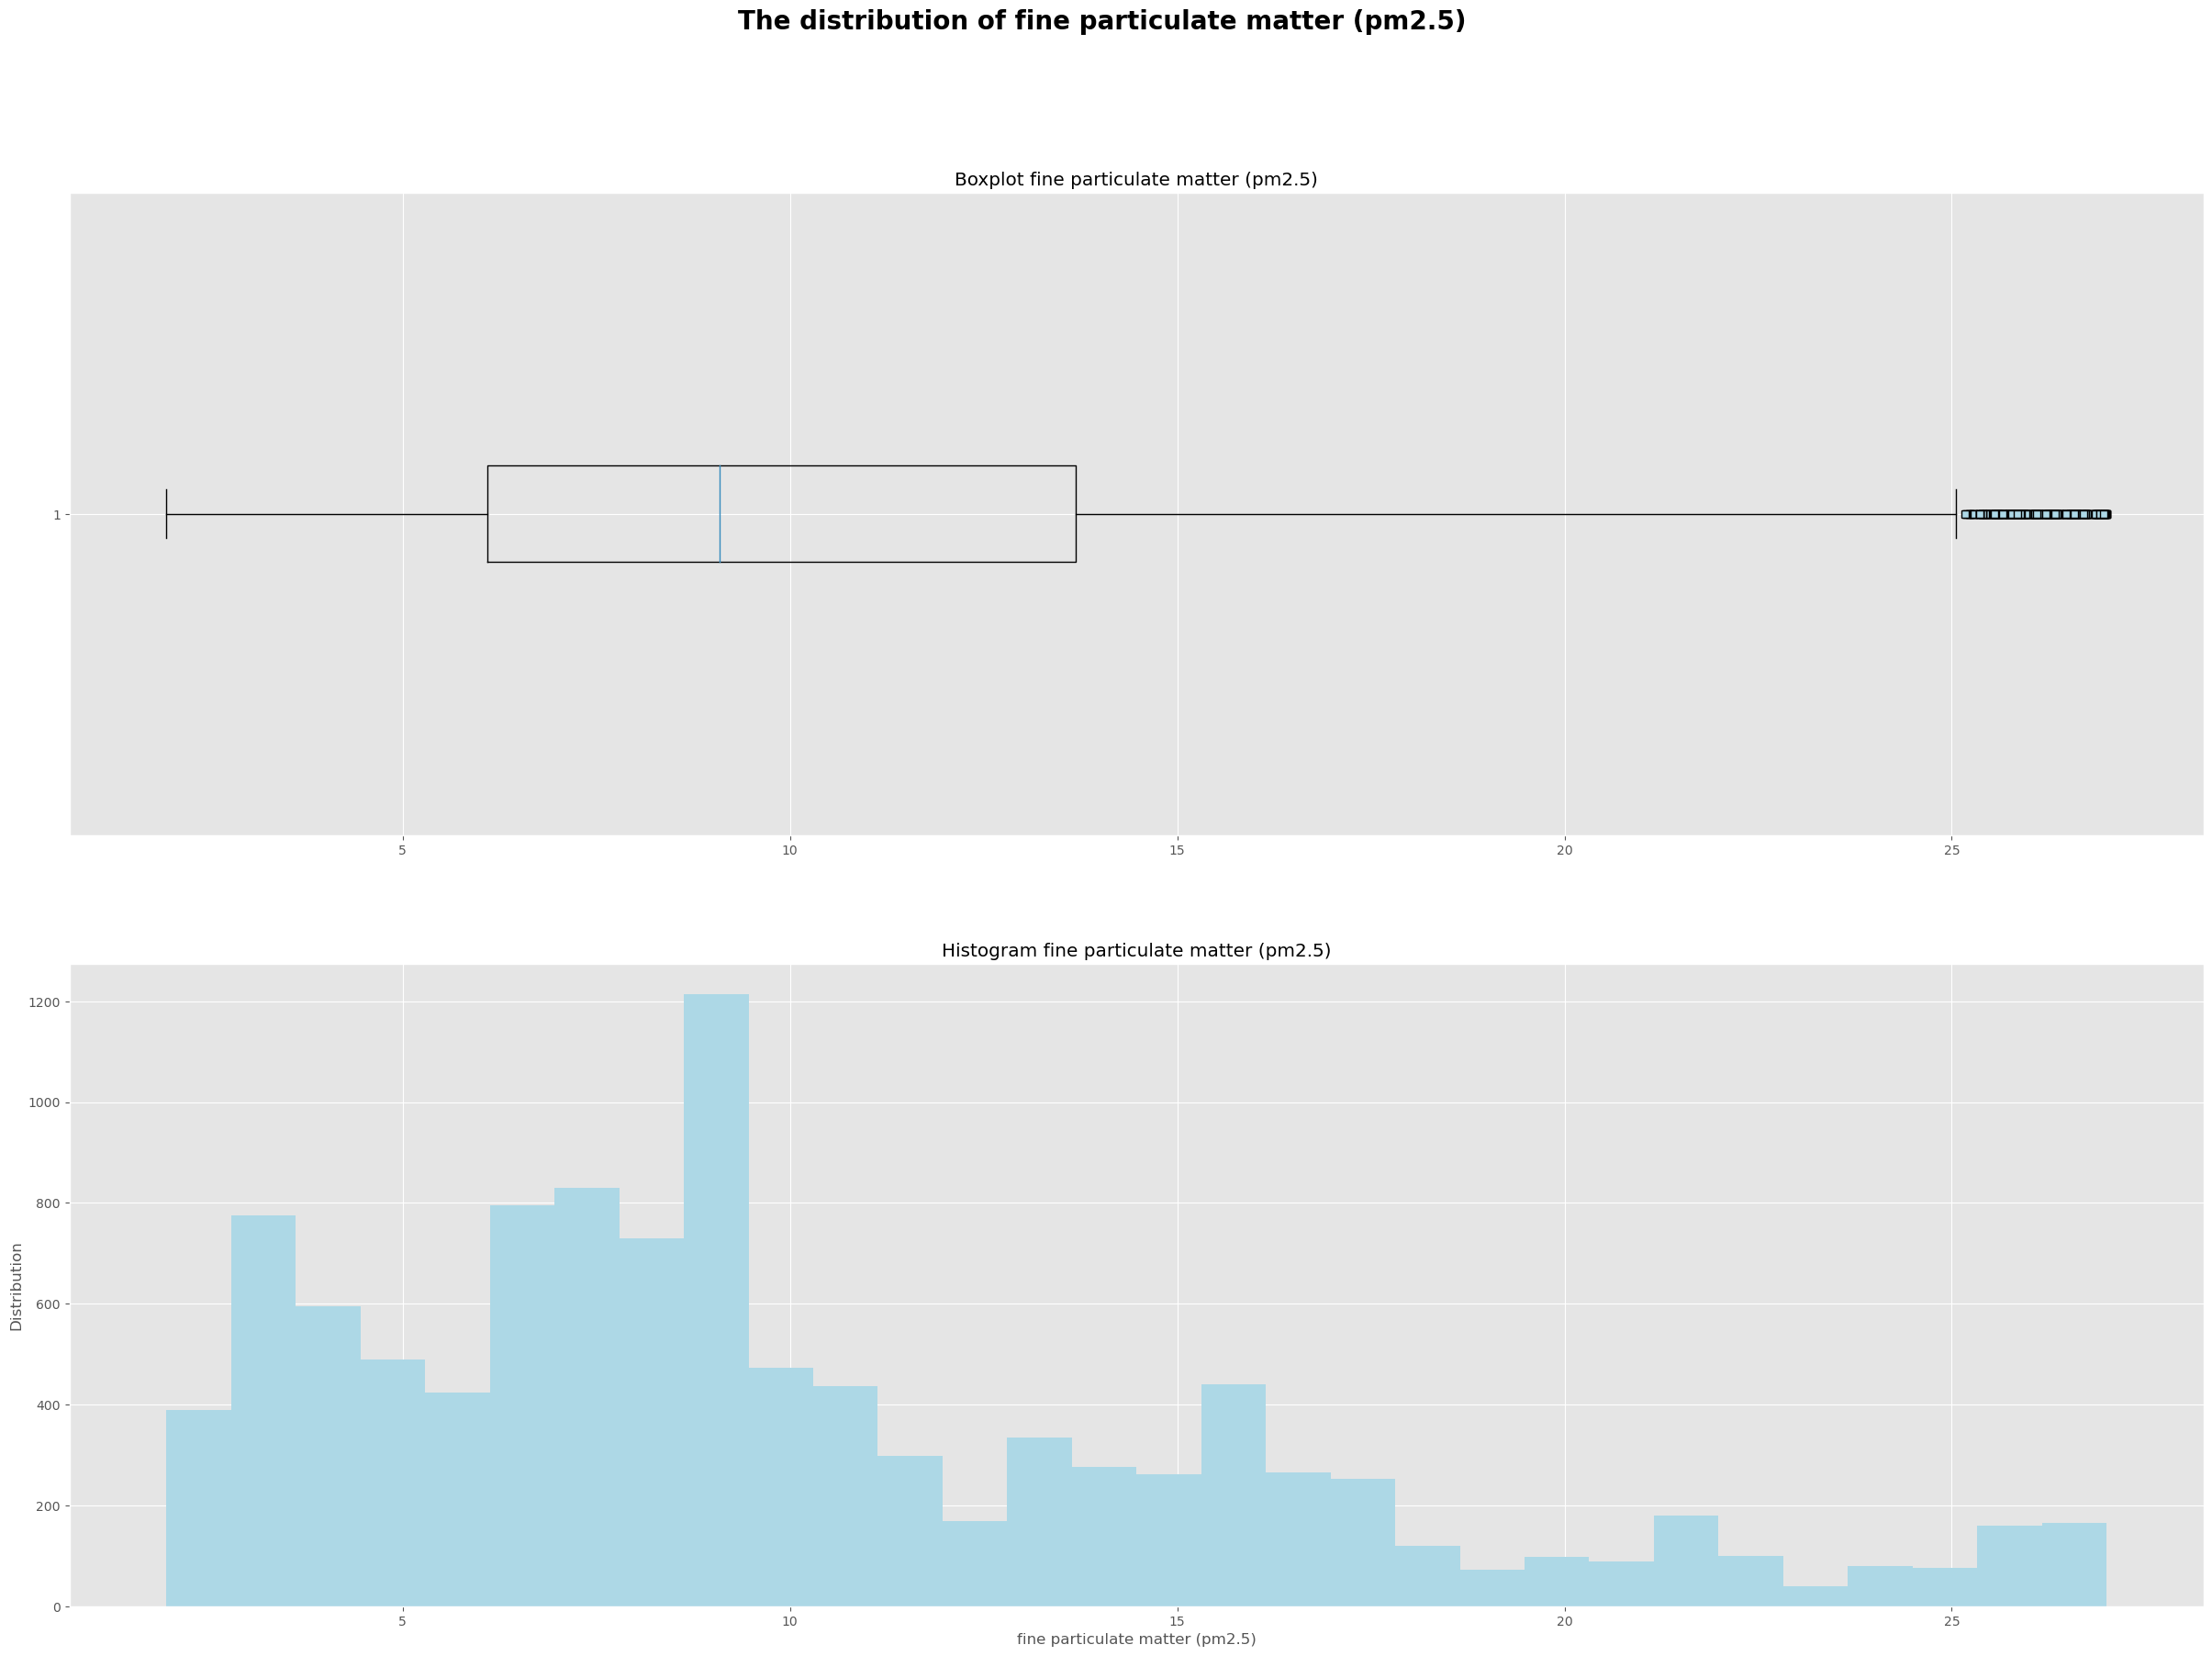

In [11]:
visualizeDistribution(df_replaced_median_outliers, "pm2.5", "fine particulate matter (pm2.5)")

<h4><font color=mediumvioletred>Export df_replaced_median_outliers to csv</font></h4>

In [12]:
df_replaced_median_outliers.to_csv("data/df_replaced_pollution_median_outliers.csv", index=False)

<h3><font color=steelblue>Replace pm2.5, people number, boundary layer height and wind speed outliers with Interquartile Range (IQR)</font></h3>

Resource: https://medium.com/analytics-vidhya/identifying-cleaning-and-replacing-outliers-titanic-dataset-20182a062893

<h4><font color=mediumvioletred>Replace pm2.5 outliers </font></h4>

In [13]:
df_replaced_iqr_outliers = df.copy()

In [14]:
Q1 = df_replaced_iqr_outliers["pm2.5"].quantile(0.25)
Q3 = df_replaced_iqr_outliers['pm2.5'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df_replaced_iqr_outliers['pm2.5'] = np.where(df_replaced_iqr_outliers['pm2.5'] > upper_whisker, upper_whisker, np.where(df_replaced_iqr_outliers['pm2.5'] < lower_whisker, lower_whisker, df_replaced_iqr_outliers['pm2.5']))

<h4><font color=mediumvioletred>Check pollution distribution in df_replaced_iqr_outliers</font></h4>

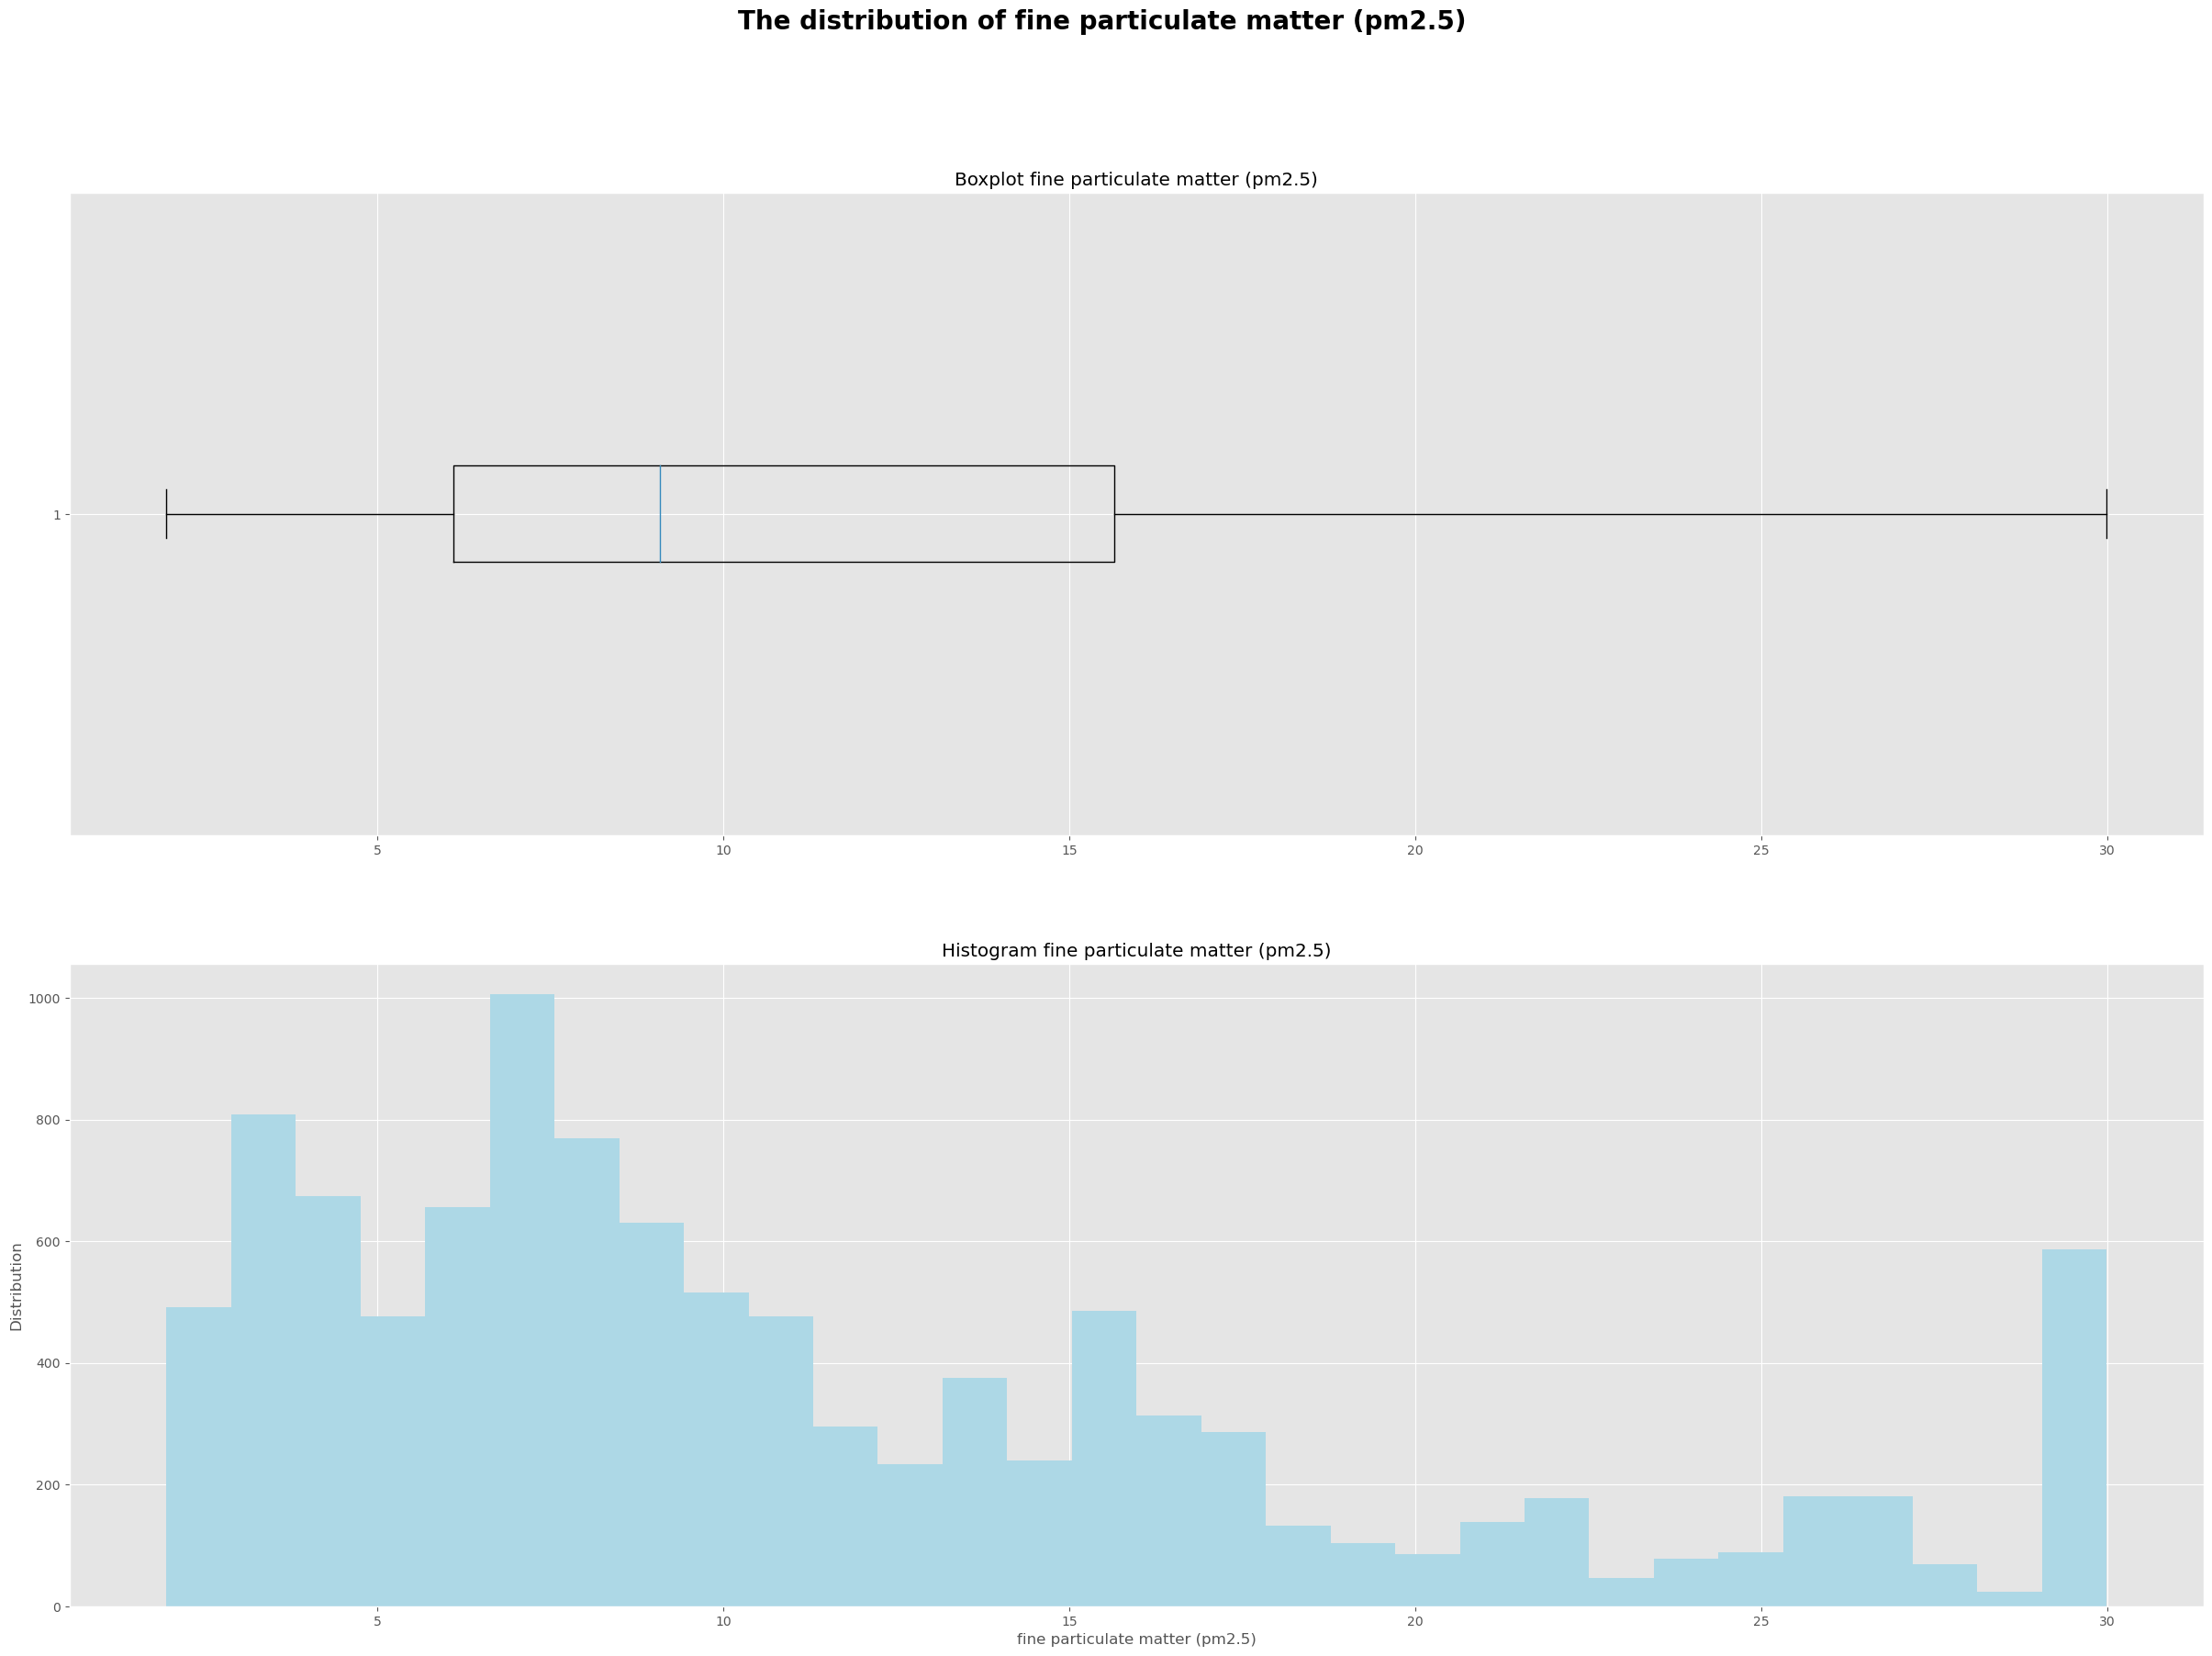

In [15]:
visualizeDistribution(df_replaced_iqr_outliers, "pm2.5", "fine particulate matter (pm2.5)")

<h4><font color=mediumvioletred>Replace people number outliers </font></h4>

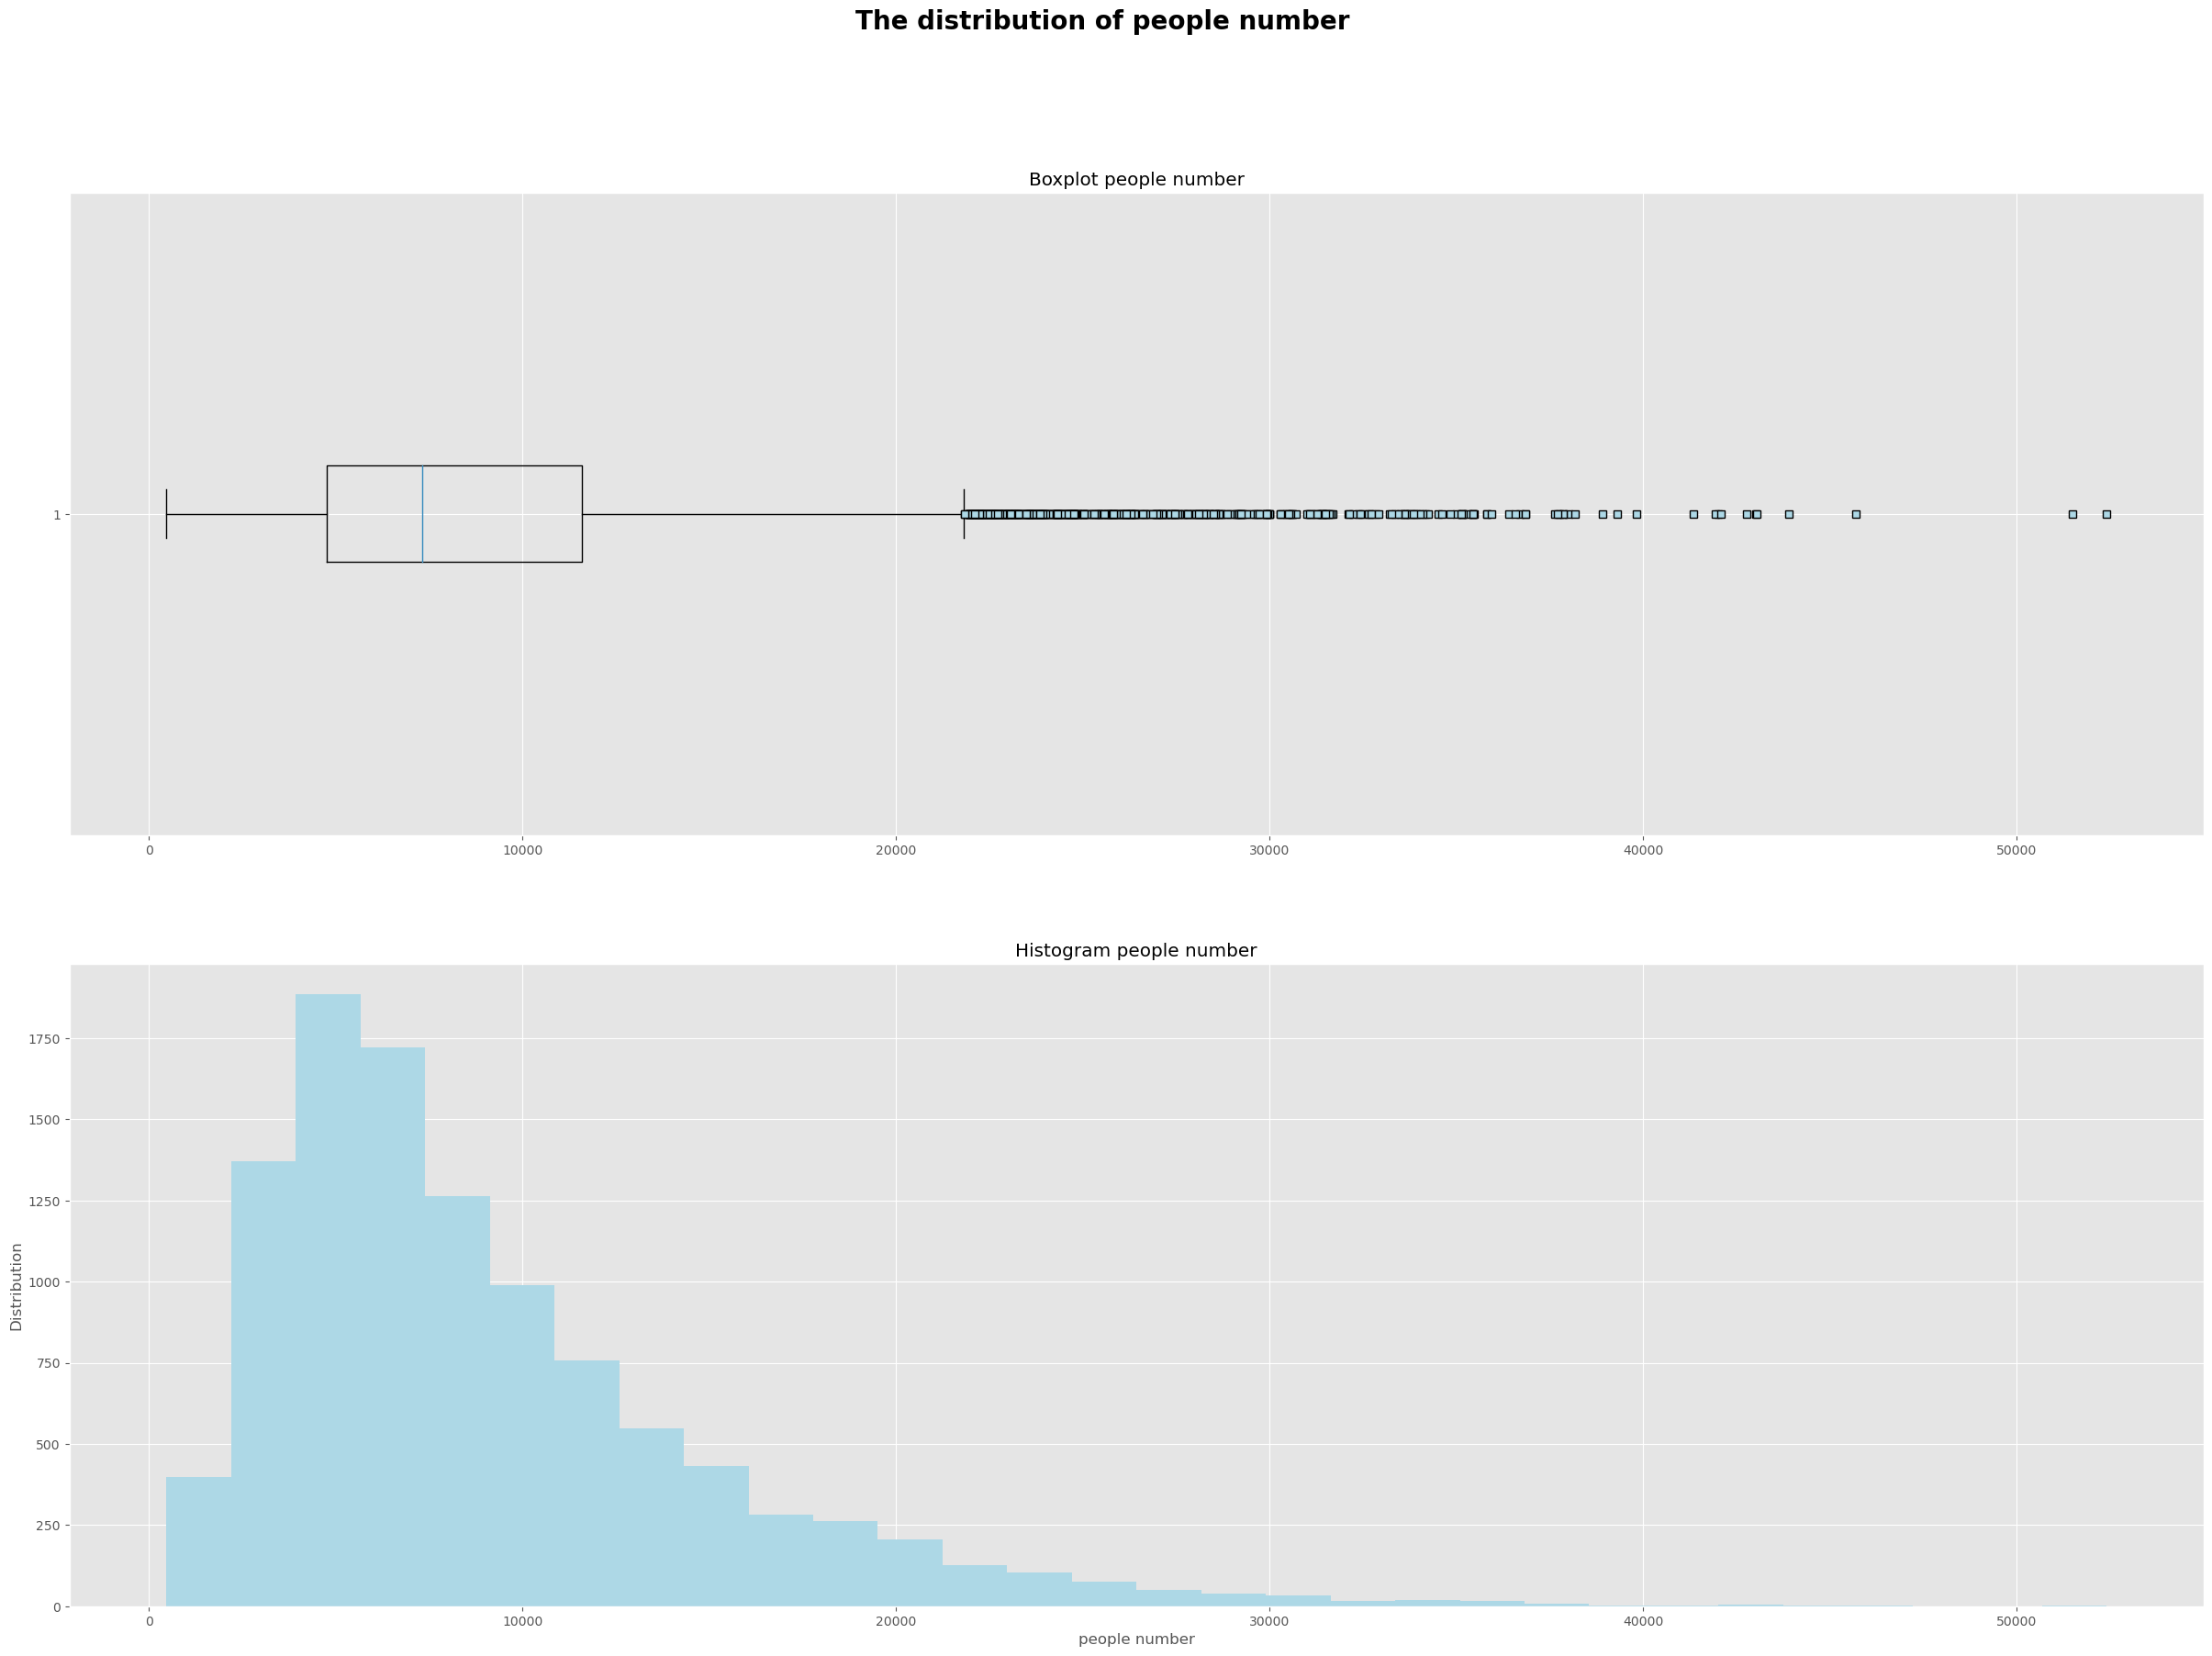

In [16]:
visualizeDistribution(df, "people_number", "people number")

In [17]:
Q1 = df_replaced_iqr_outliers["people_number"].quantile(0.25)
Q3 = df_replaced_iqr_outliers['people_number'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df_replaced_iqr_outliers['people_number'] = np.where(df_replaced_iqr_outliers['people_number'] > upper_whisker, upper_whisker, np.where(df_replaced_iqr_outliers['people_number'] < lower_whisker, lower_whisker, df_replaced_iqr_outliers['people_number']))

<h4><font color=mediumvioletred>Check people number distribution in df_replaced_iqr_outliers</font></h4>

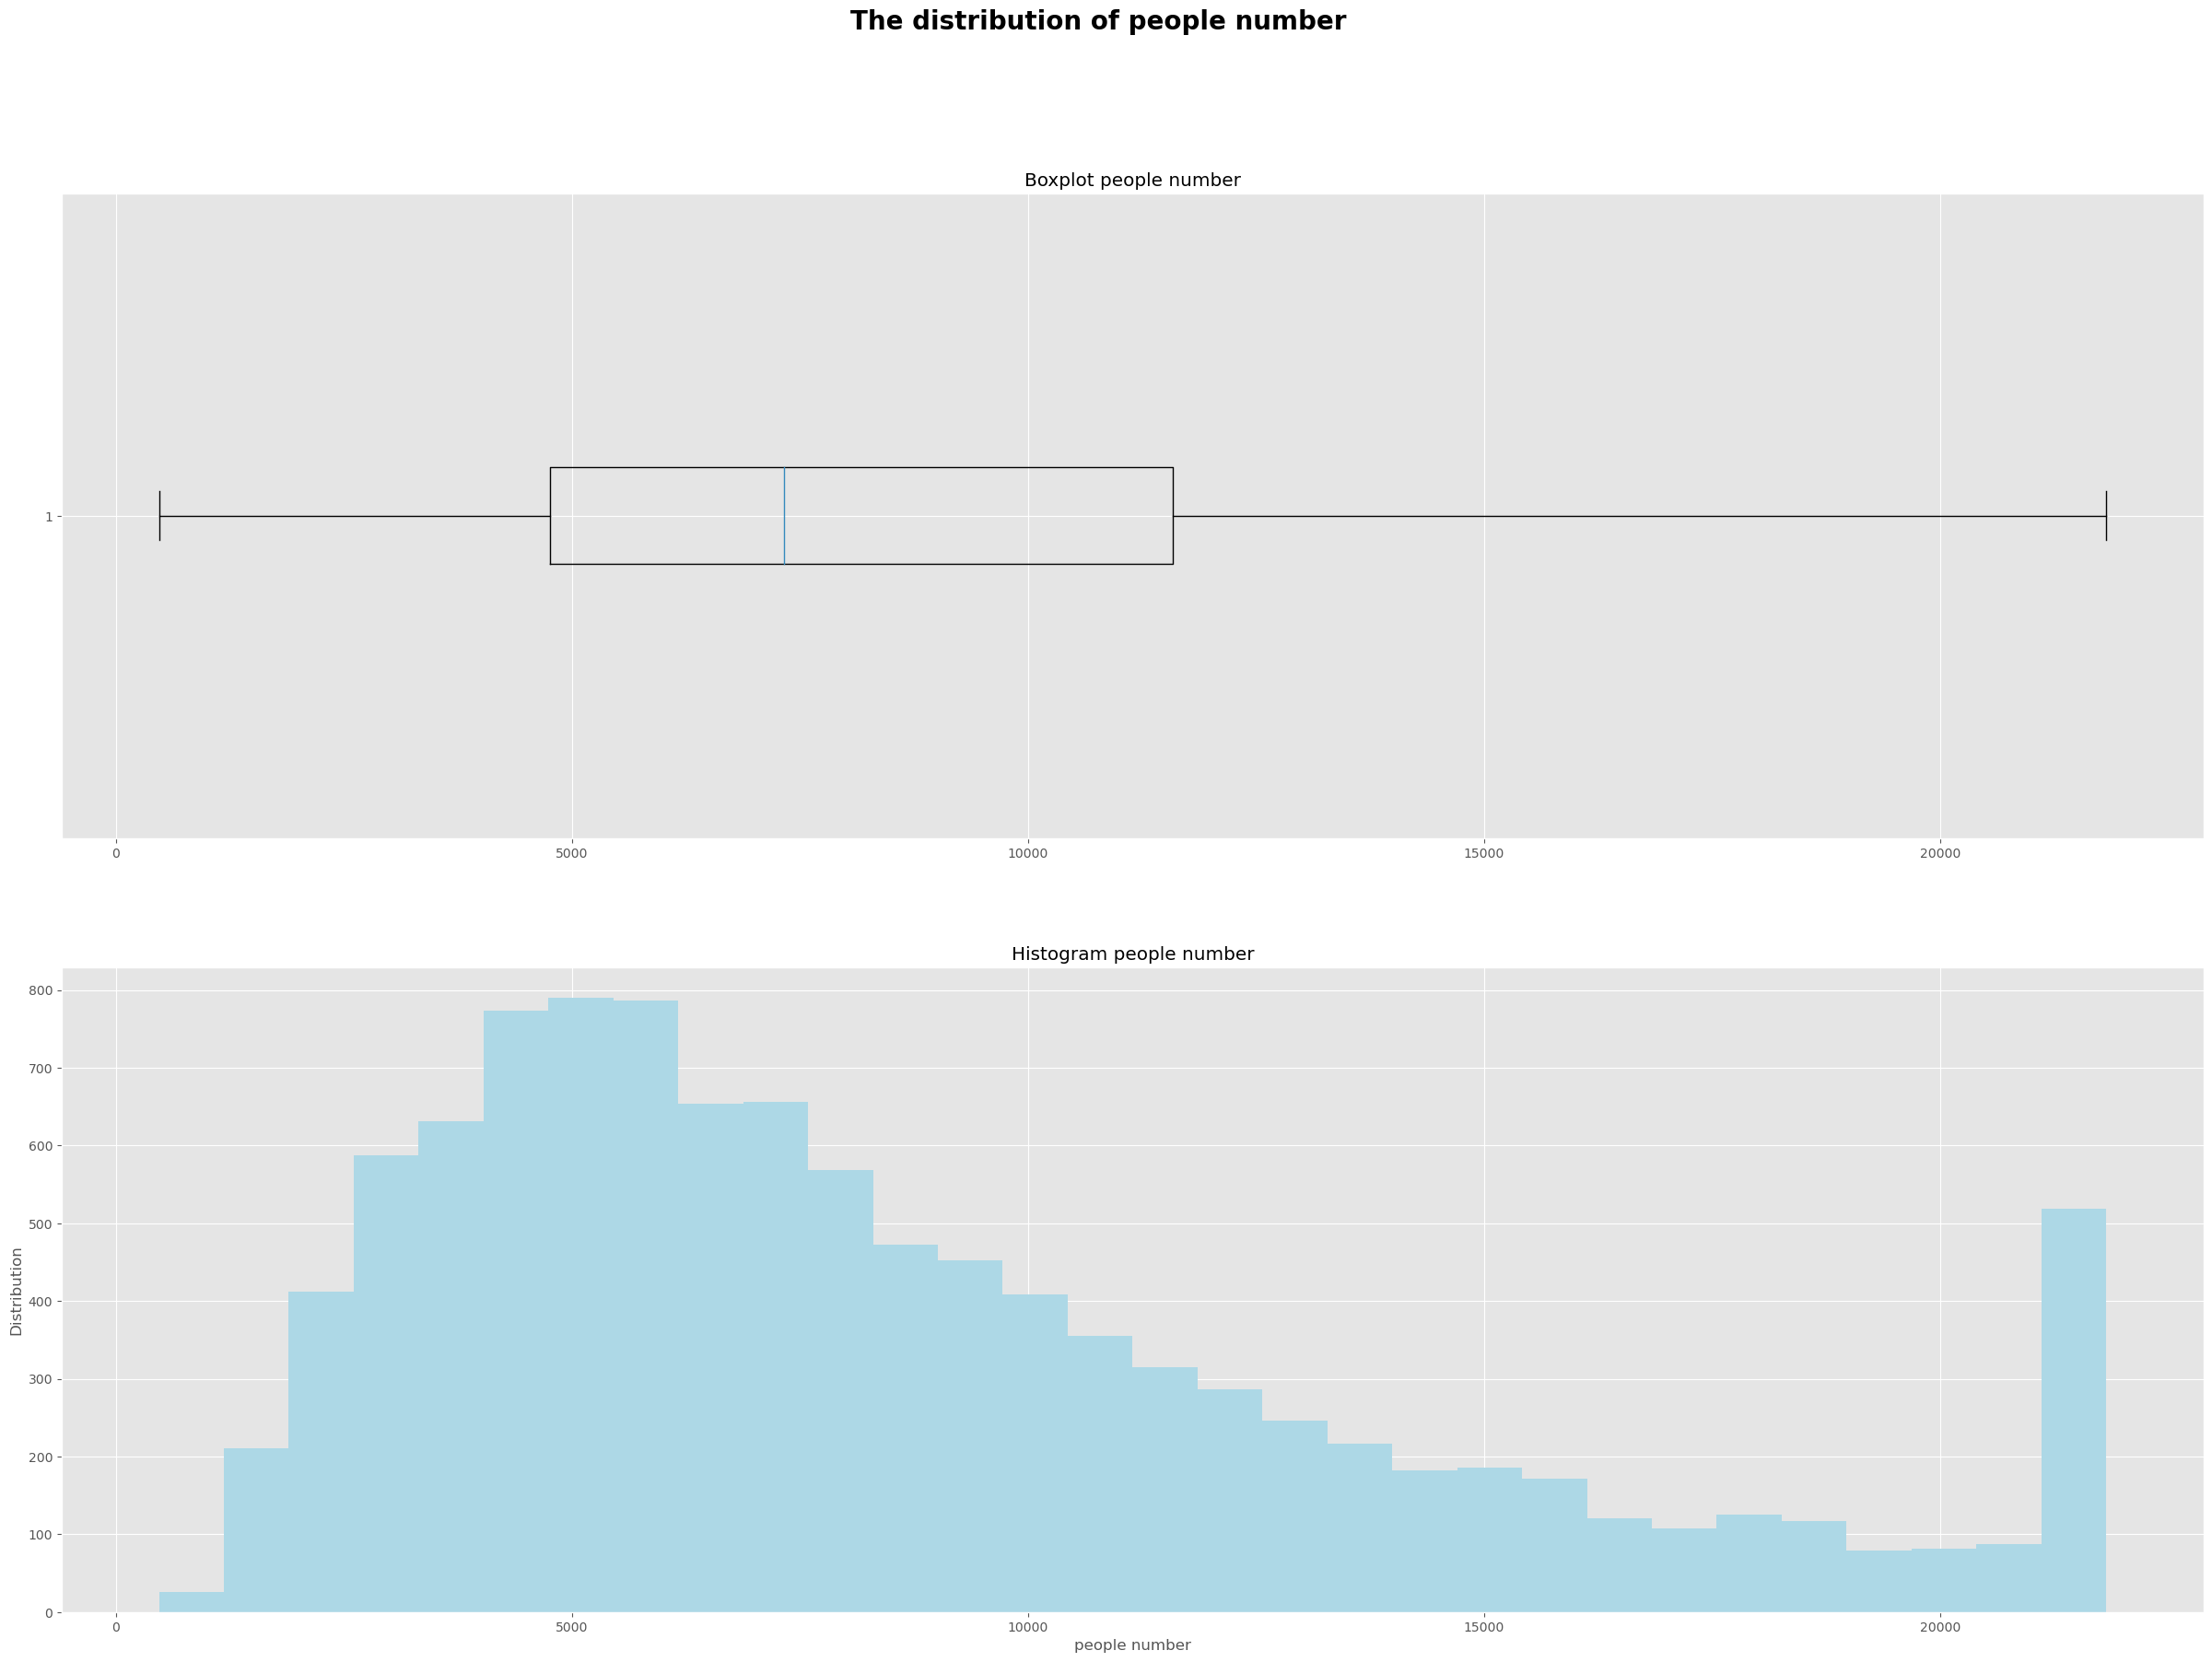

In [18]:
visualizeDistribution(df_replaced_iqr_outliers, "people_number", "people number")

<h4><font color=mediumvioletred>Replace boundary layer height outliers </font></h4>

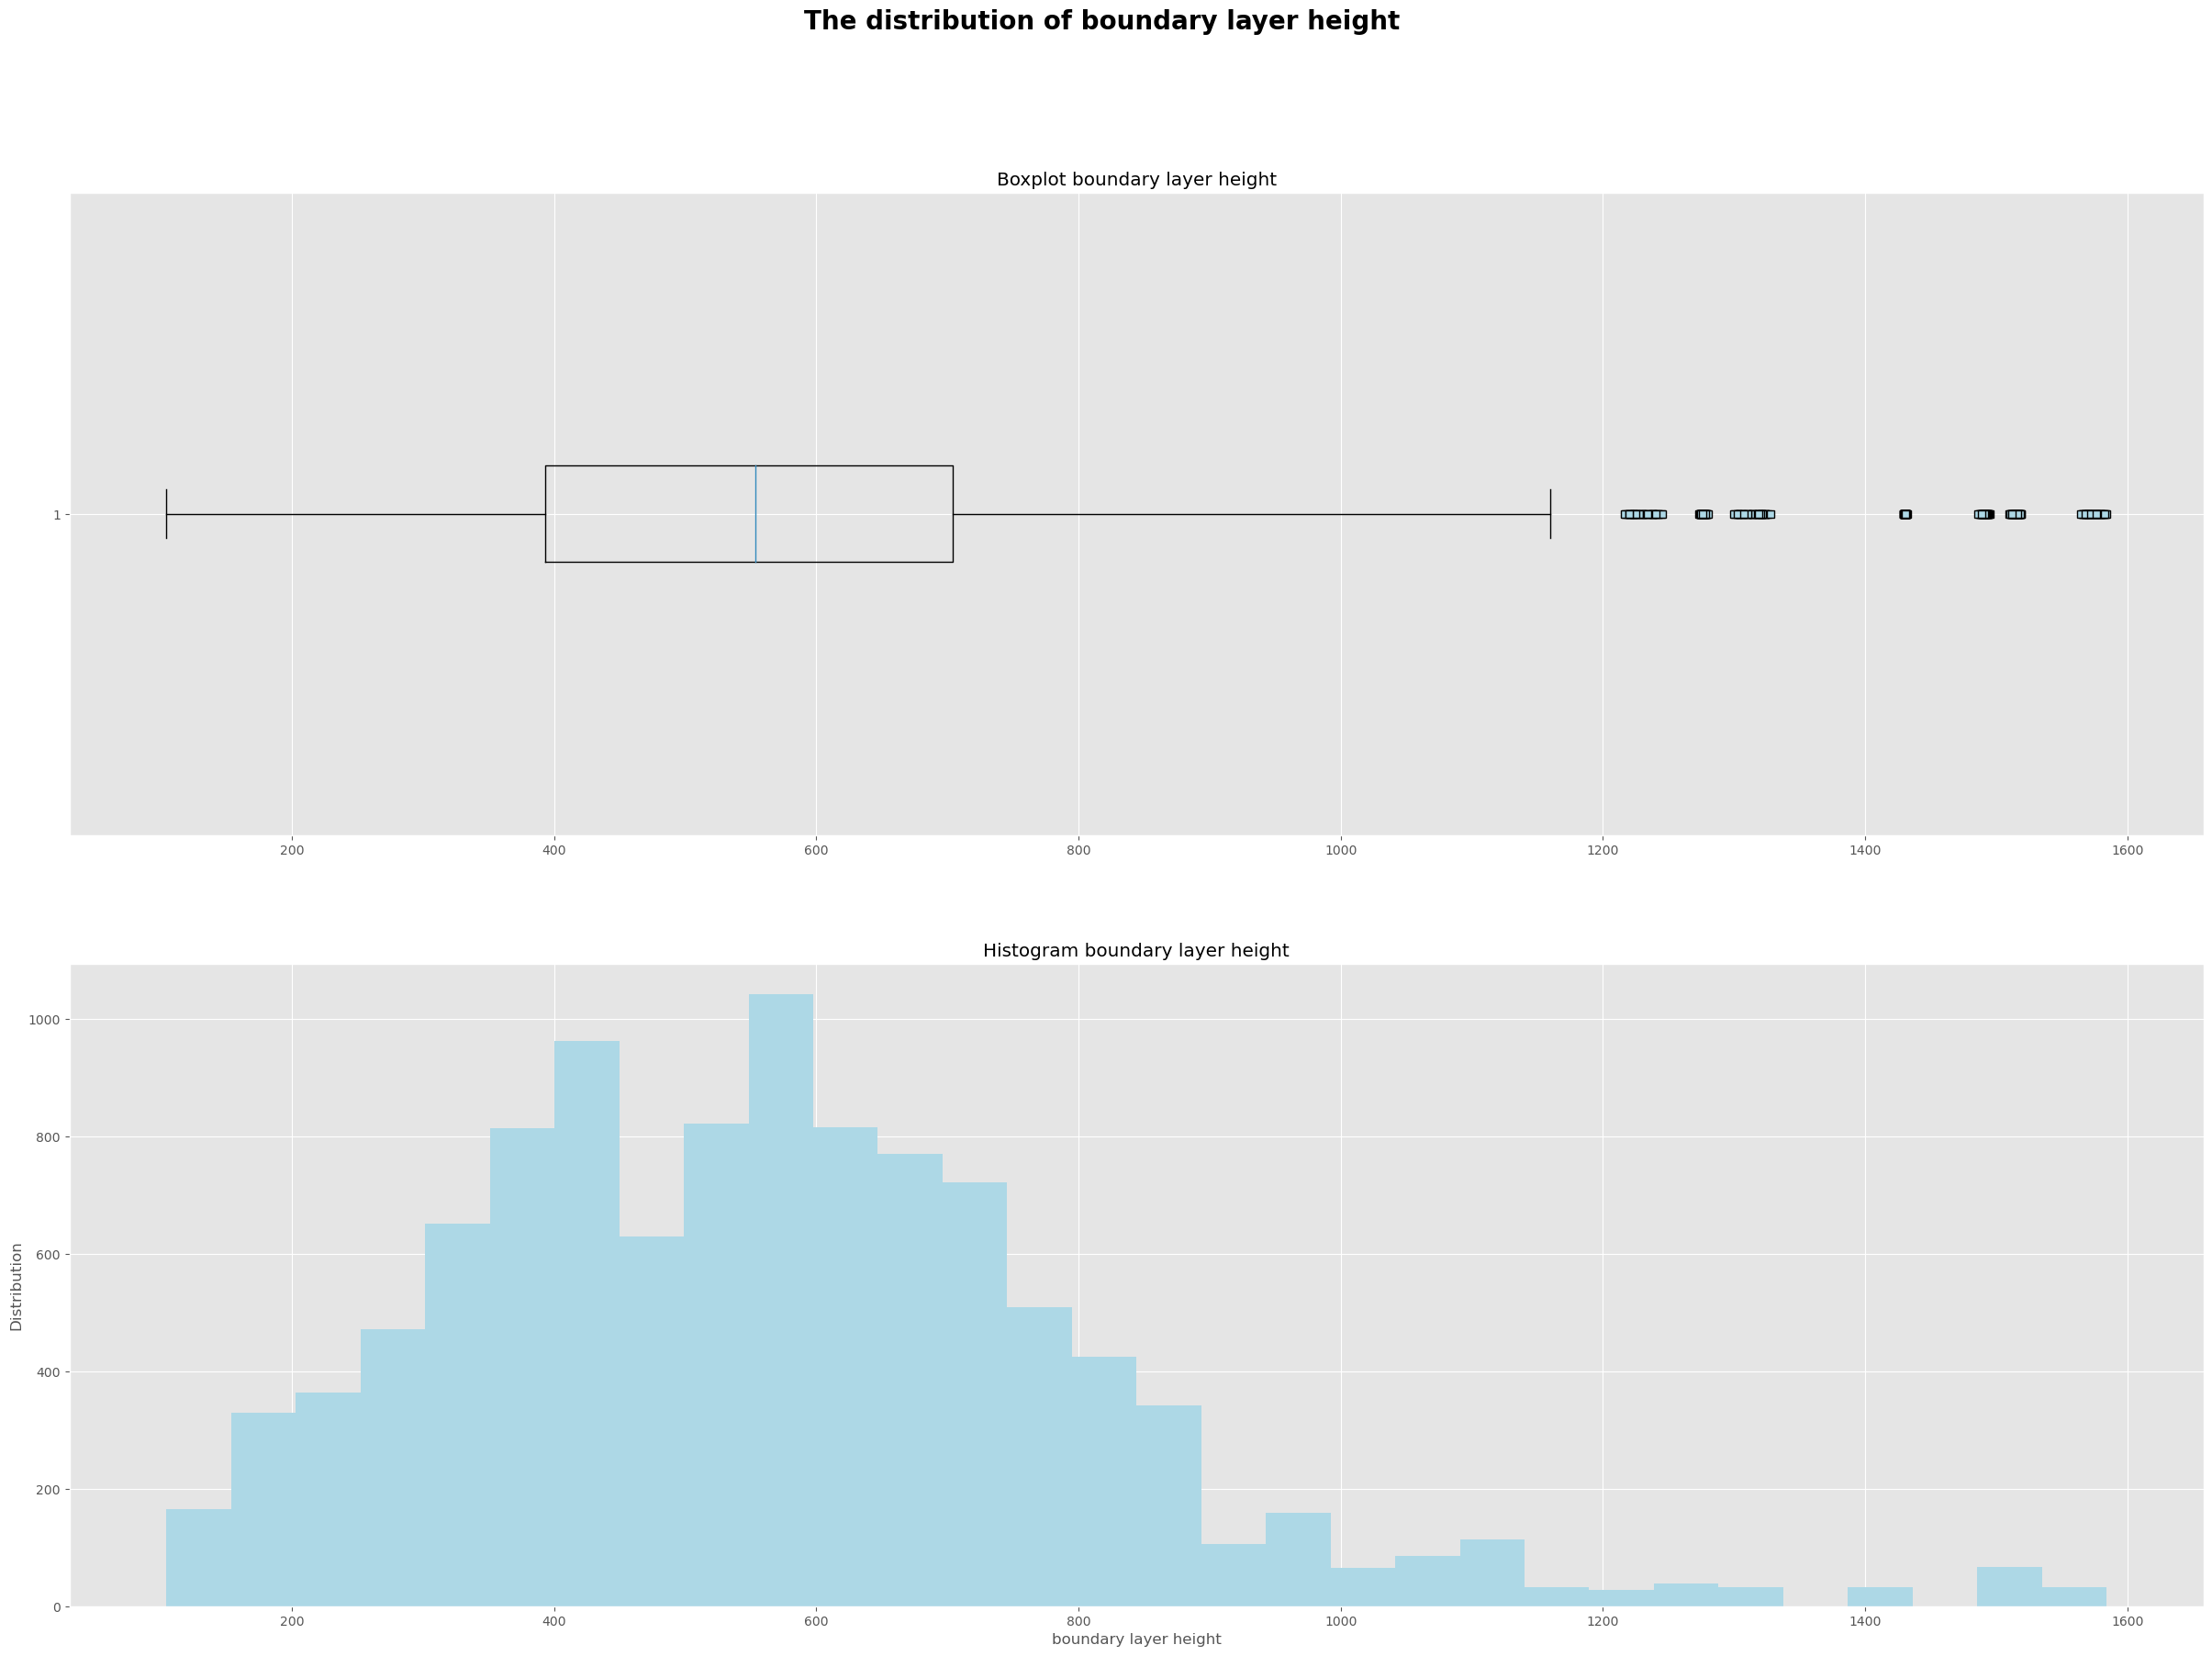

In [19]:
visualizeDistribution(df, "blh", "boundary layer height")

In [20]:
Q1 = df_replaced_iqr_outliers["blh"].quantile(0.25)
Q3 = df_replaced_iqr_outliers['blh'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df_replaced_iqr_outliers['blh'] = np.where(df_replaced_iqr_outliers['blh'] > upper_whisker, upper_whisker, np.where(df_replaced_iqr_outliers['blh'] < lower_whisker, lower_whisker, df_replaced_iqr_outliers['blh']))

<h4><font color=mediumvioletred>Check boundary layer height distribution in df_replaced_iqr_outliers</font></h4>

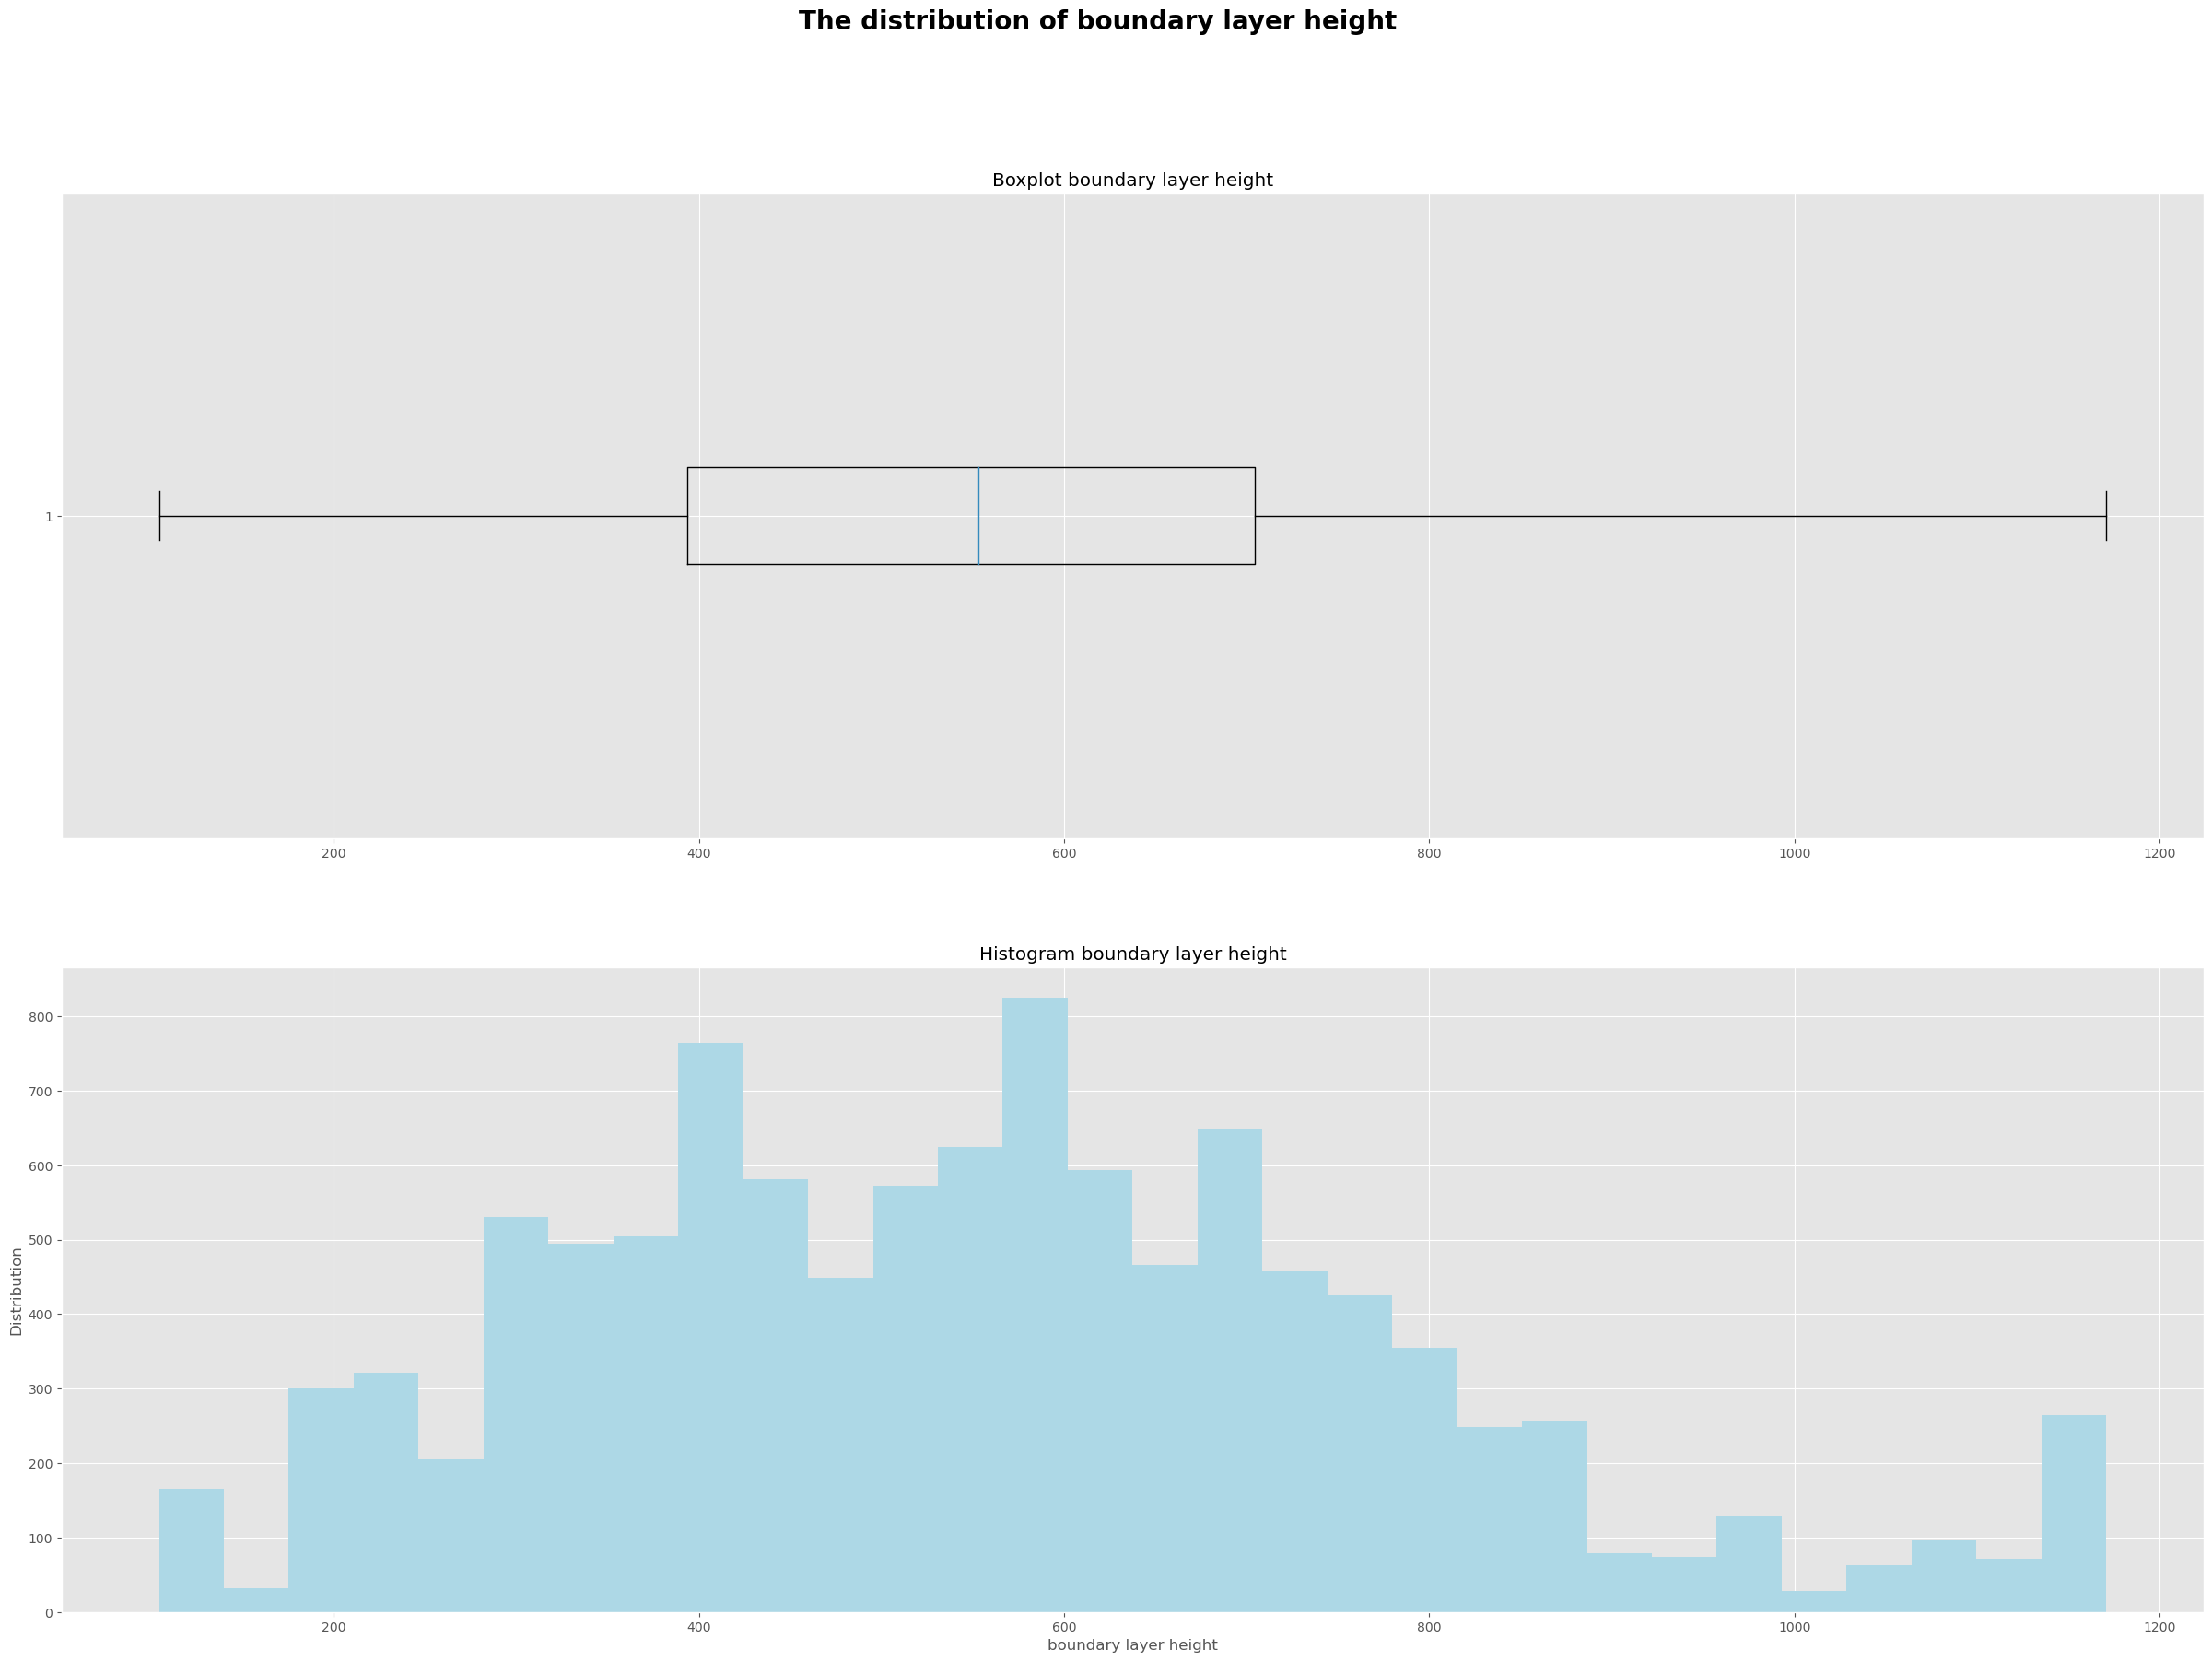

In [21]:
visualizeDistribution(df_replaced_iqr_outliers, "blh", "boundary layer height")

<h4><font color=mediumvioletred>Replace wind speed outliers </font></h4>

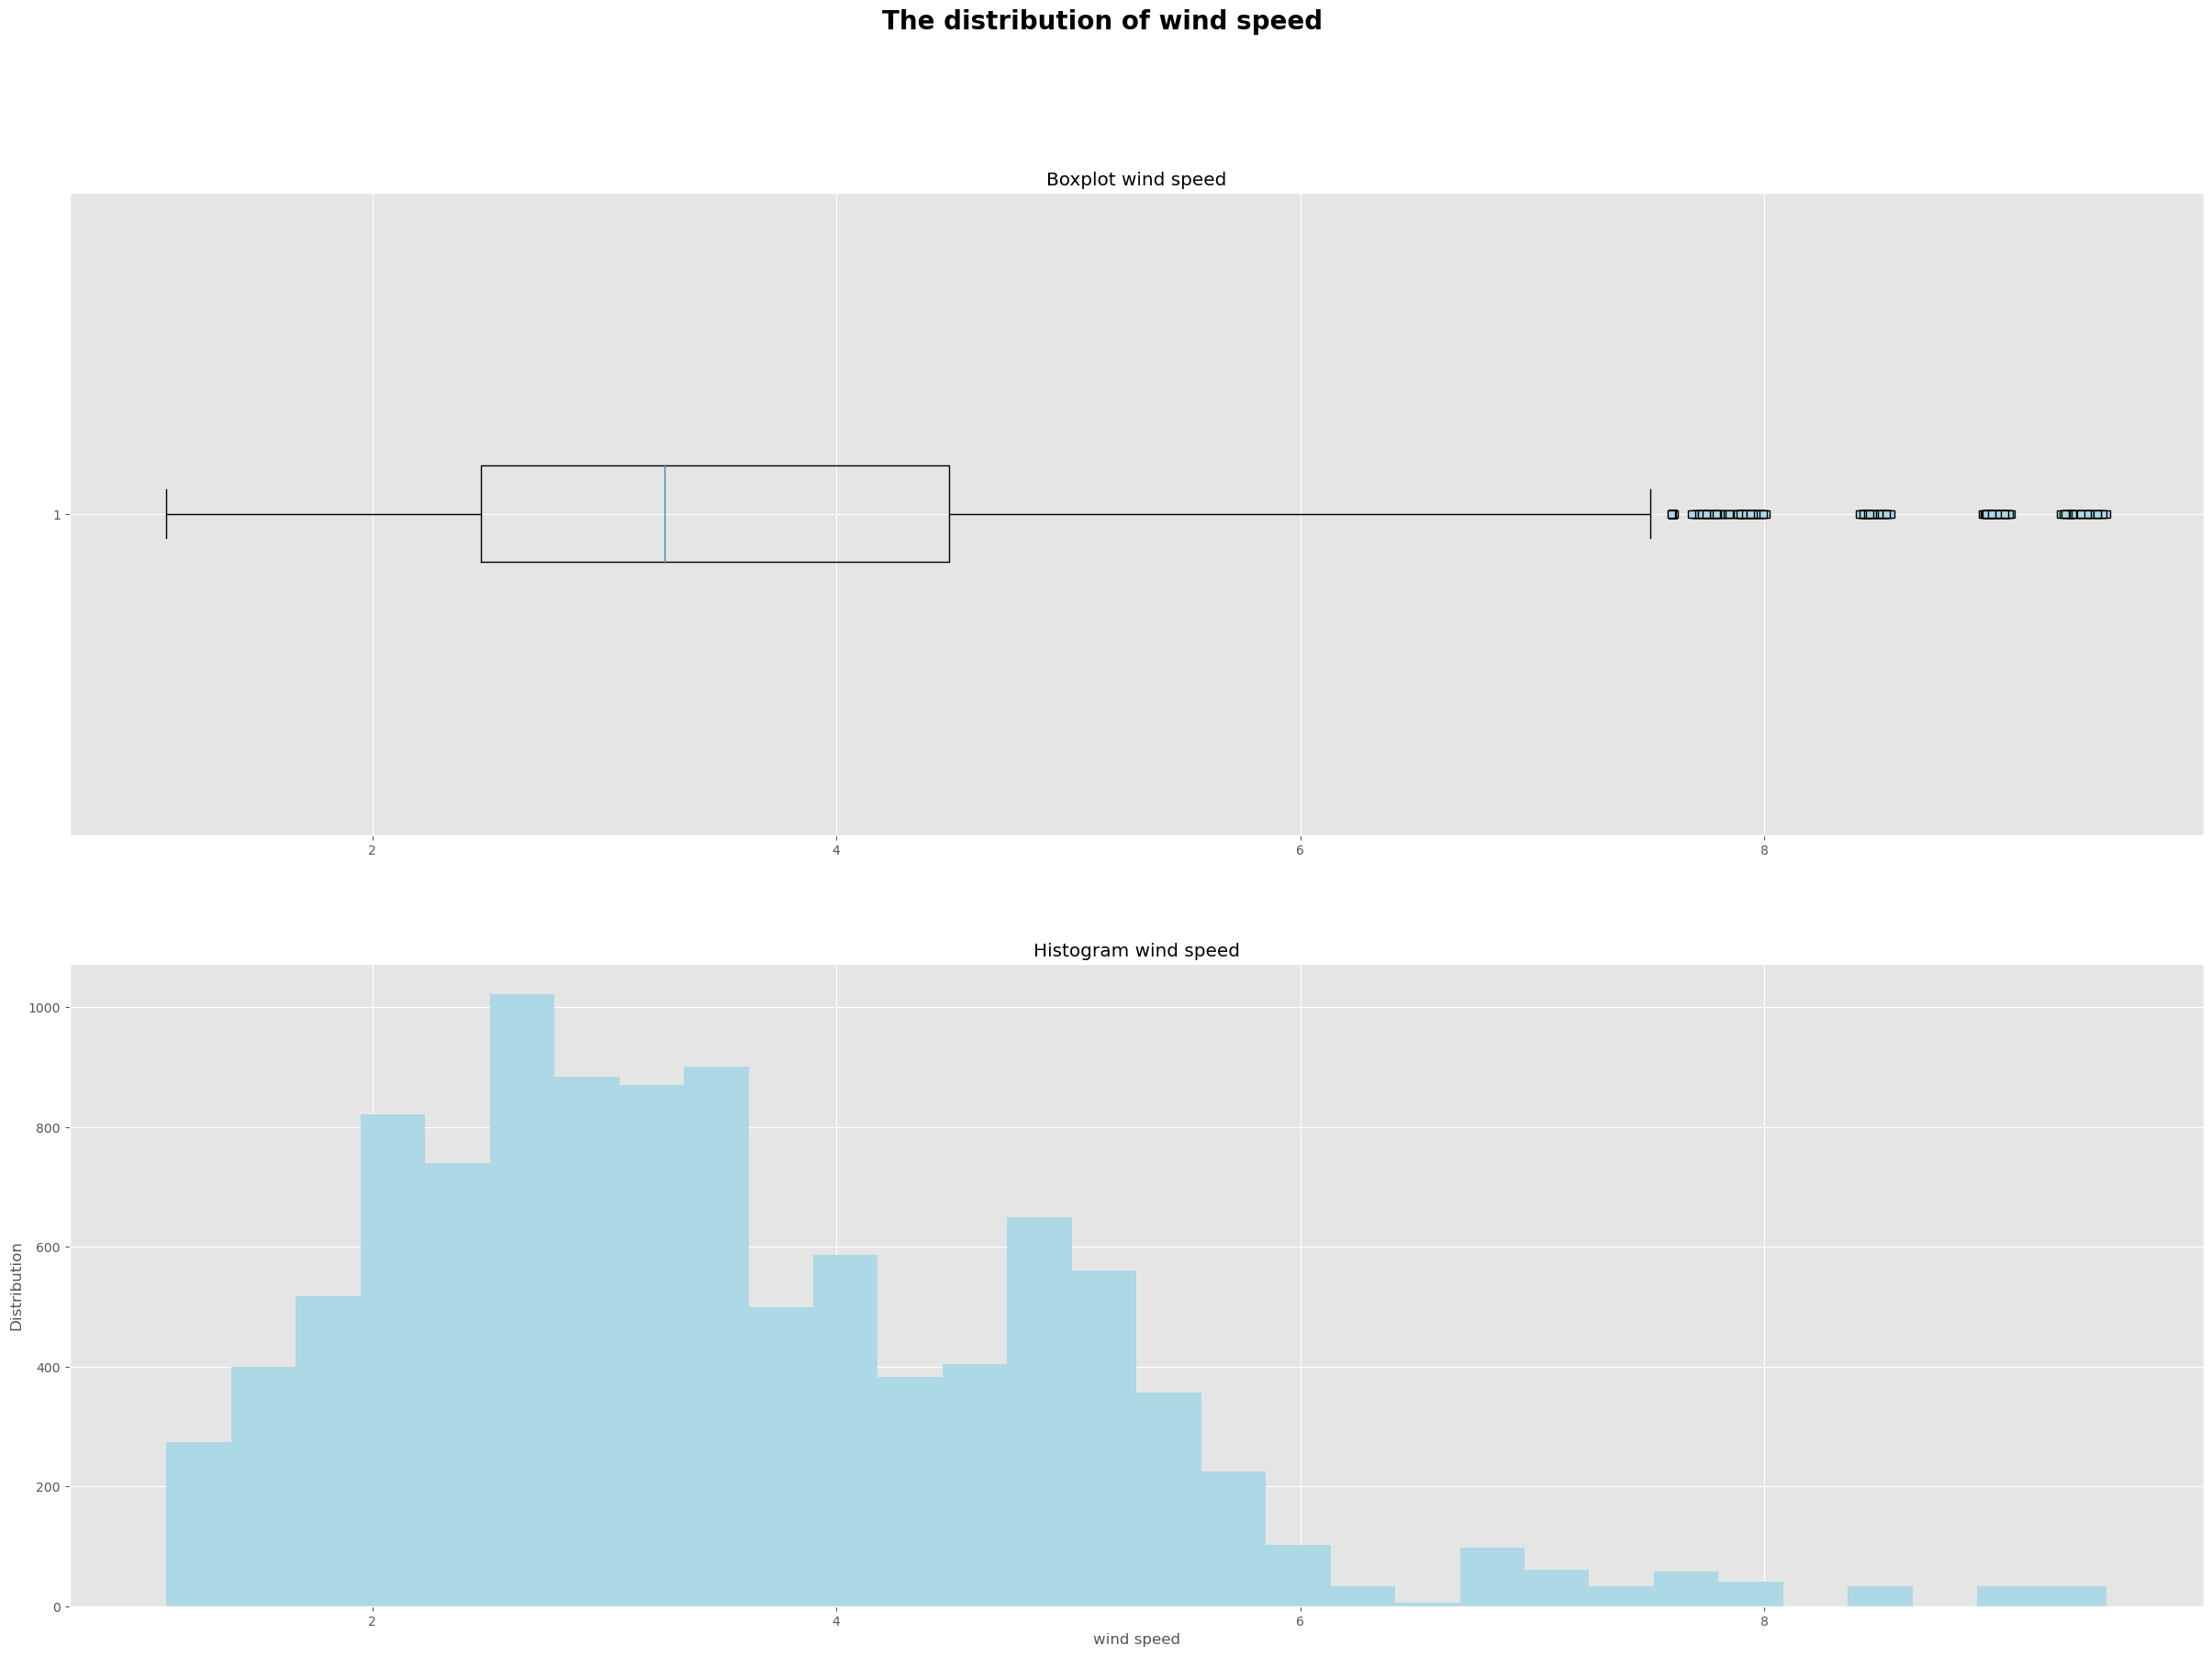

In [22]:
visualizeDistribution(df, "ws", "wind speed")

In [23]:
Q1 = df_replaced_iqr_outliers["ws"].quantile(0.25)
Q3 = df_replaced_iqr_outliers['ws'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width * IQR)
upper_whisker = Q3 + (whisker_width * IQR)
df_replaced_iqr_outliers['ws'] = np.where(df_replaced_iqr_outliers['ws'] > upper_whisker, upper_whisker, np.where(df_replaced_iqr_outliers['ws'] < lower_whisker, lower_whisker, df_replaced_iqr_outliers['ws']))

<h4><font color=mediumvioletred>Check wind speed distribution in df_replaced_iqr_outliers</font></h4>

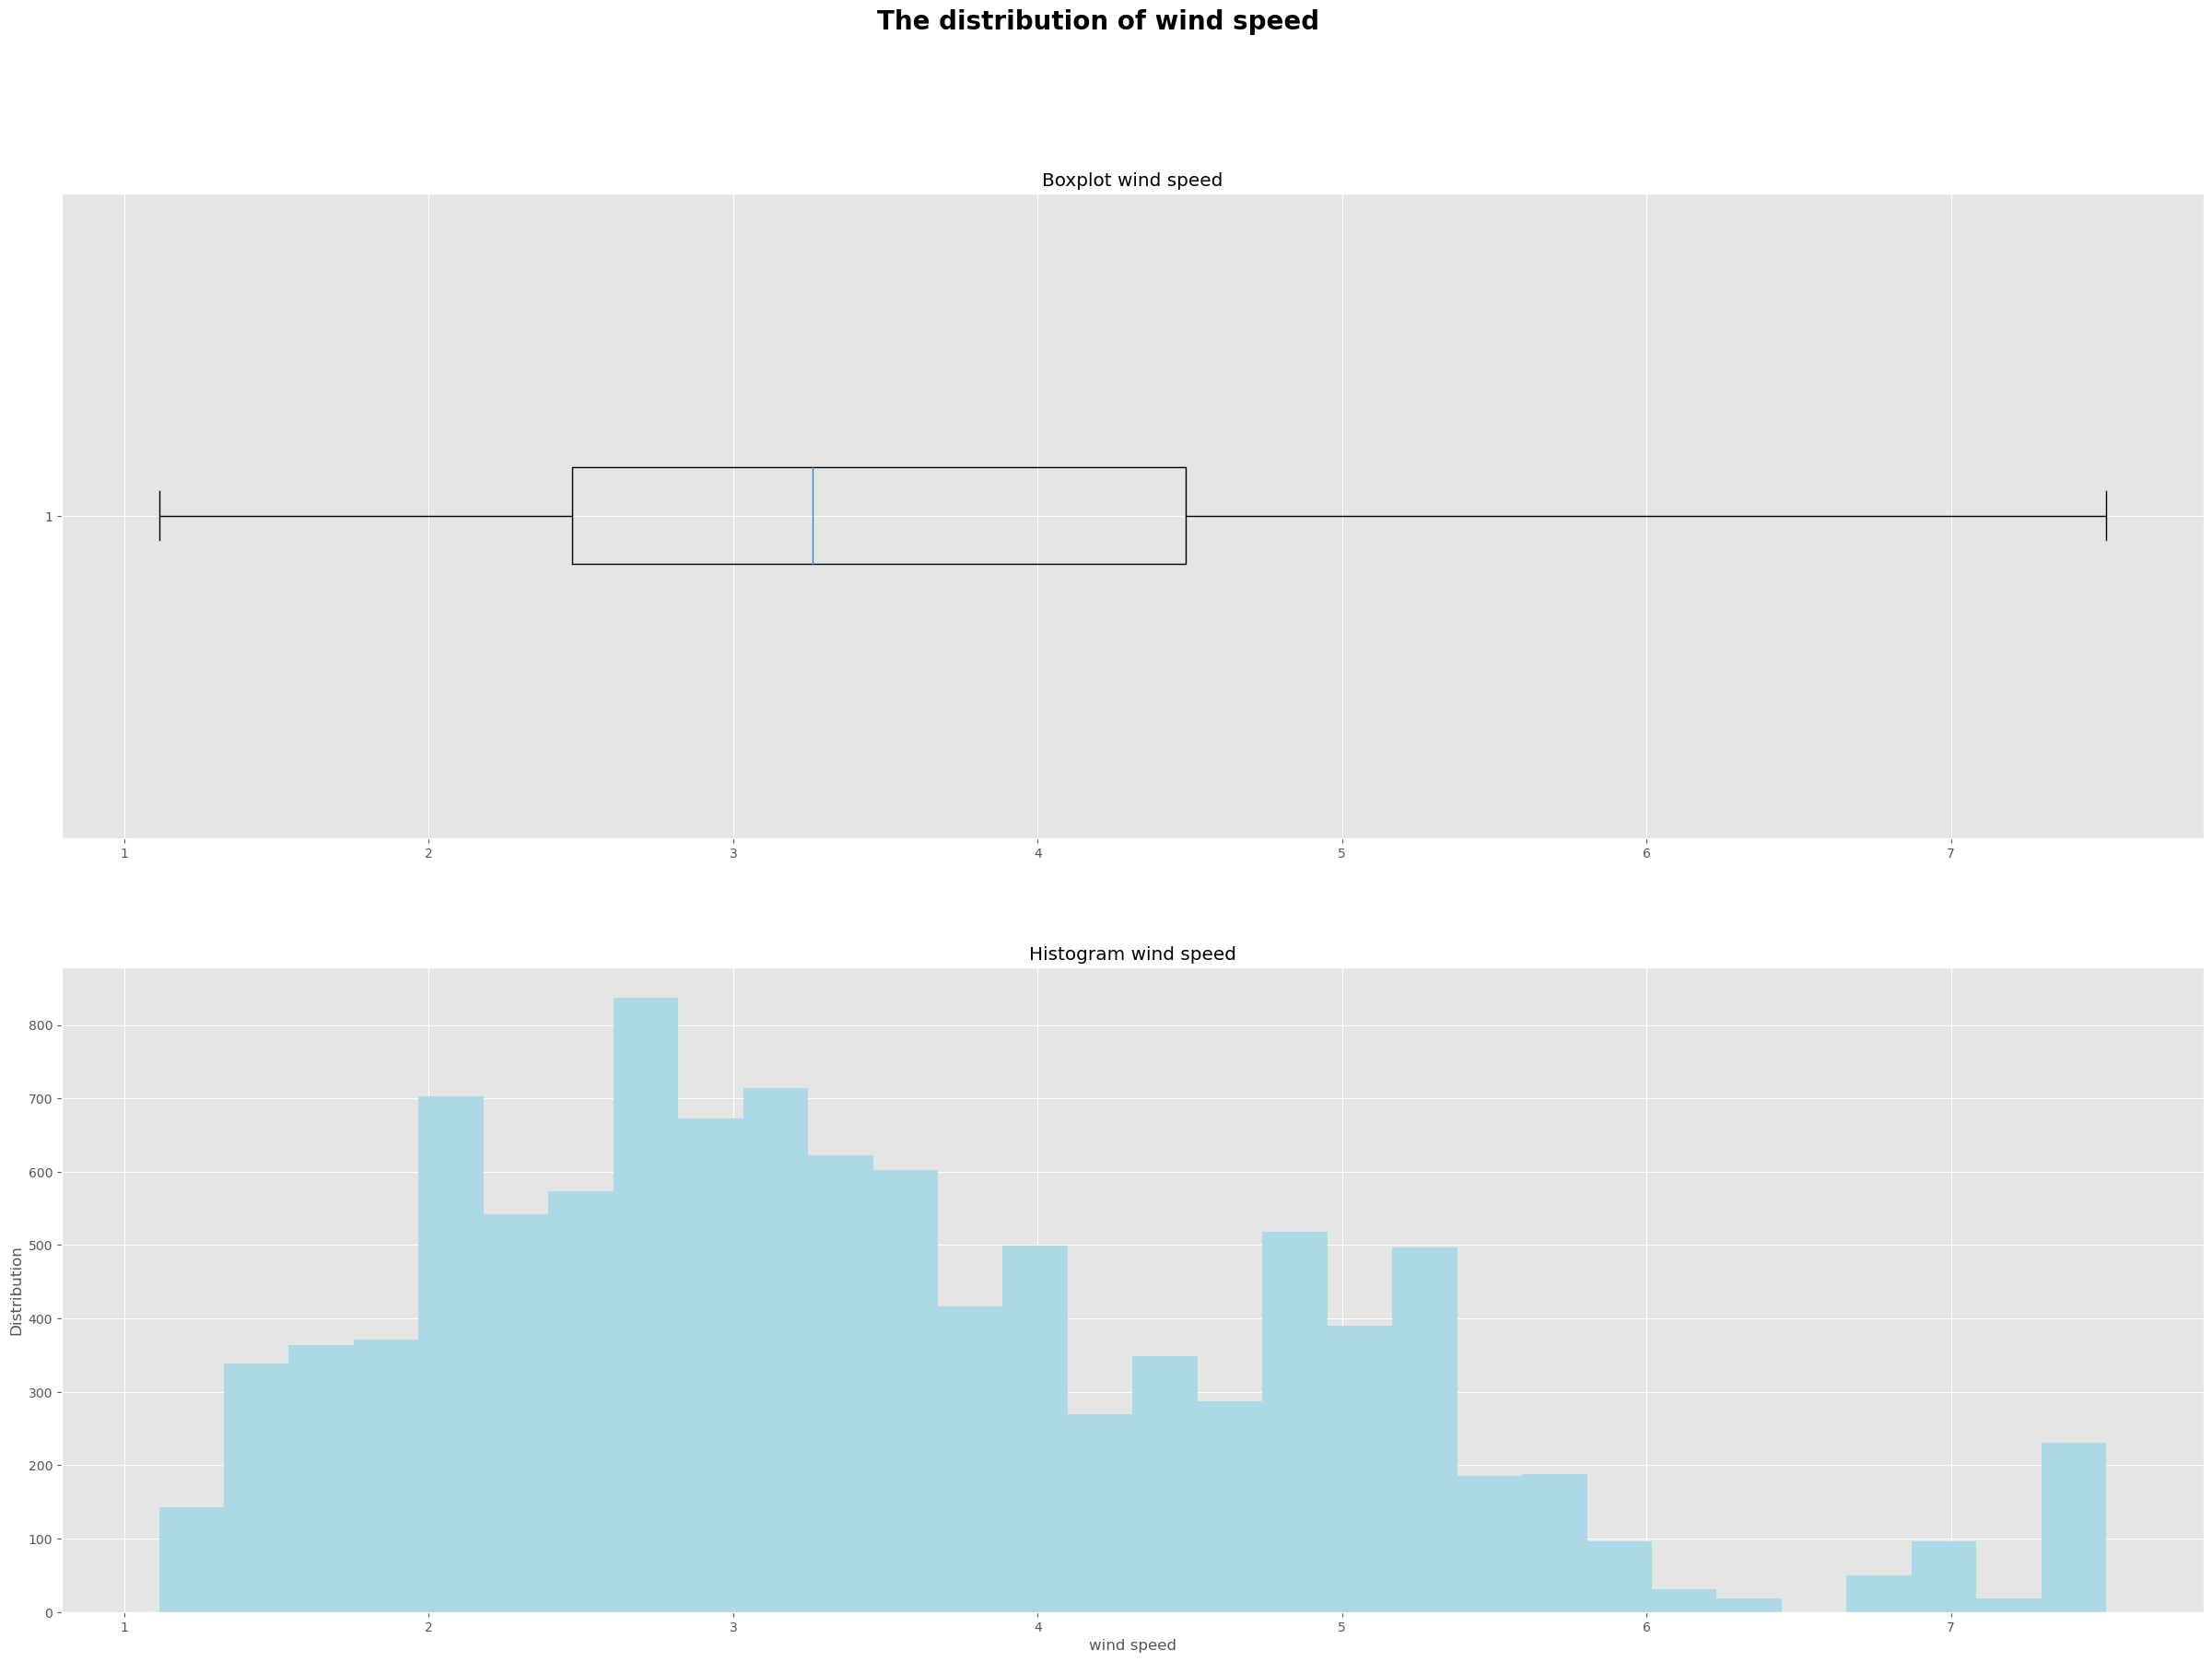

In [24]:
visualizeDistribution(df_replaced_iqr_outliers, "ws", "wind speed")

<h4><font color=mediumvioletred>Export df_replaced_iqr_outliers to csv</font></h4>

In [25]:
df.to_csv("data/df_replaced_iqr_outliers.csv", index=False)